# Basis metadata analysis on 16-component NMF for CD3+ dataset. No interesting findings

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')

import OONMF
import OONMFhelpers as OH
import OONMFmetadata as OMD

In [2]:
myNMF = OONMF.NMFobject(16)


In [3]:
def acquire_data():

    data = pd.read_csv('matrix_all_WM20190708_CD3_hg19.txt', sep='\t', header=None)
    return (data.drop([data.columns[0]], axis=1).values.T > 1e-12).astype(int)

In [4]:
ML_matrix = acquire_data()

In [5]:
ML_matrix.shape

(148, 163998)

In [6]:
myNMF.performNMF(ML_matrix,theinit='nndsvd')


starting NMF at  20190724_15:34:22
done with NMF at  20190724_15:34:56
returning reconstruction error


977.0573668618275

In [7]:
myNMF.Basis.shape

(148, 16)

In [8]:
np.sum(ML_matrix==0) / (ML_matrix.shape[0] * ML_matrix.shape[1])

0.7108767888731669

In [9]:
np.sum(myNMF.Basis==0) / (myNMF.Basis.shape[0] * myNMF.Basis.shape[1])

0.5793918918918919

In [10]:
np.sum(myNMF.Mixture==0) / (myNMF.Mixture.shape[0] * myNMF.Mixture.shape[1])

0.4999226362516616

In [11]:
metadata = pd.read_csv('metadata.txt', sep='\t')

In [12]:
metadata.shape

(148, 62)

In [13]:
metadata.head(5)

tissue_culture tissue_culture_notes  \
0         TC9754                  NaN   
1         TC8650                  NaN   
2         TC8662                  NaN   
3         TC8652                  NaN   
4         TC8648                  NaN   

                                tissue_culture_extra sample_number  \
0  Dead cell removal kit (PBMC) and bead purifica...       DS73141   
1  bead purification, negative selection with Ste...       DS71882   
2       bead purification, with Stemcells kit #19051       DS71905   
3  bead purification, negative selection with Ste...       DS71887   
4  bead purification, negative selection with Ste...       DS71880   

  sample_status    sample_assay sample_prep_date  sample_timepoint  \
0       Hold 4C  DHS-pseudonano          6/11/19               NaN   
1       Hold 4C  DHS-pseudonano           3/7/19               NaN   
2       Hold 4C  DHS-pseudonano           3/8/19               NaN   
3       Hold 4C  DHS-pseudonano           3/7/19               NaN   
4       Hold 4C  DHS-pseudonano           3/7/19               NaN   

               sample_extra sample_notes  \
0  Derived from frozen PBMC          NaN   
1       anticoagulant: EDTA          NaN   
2                       NaN          NaN   
3       anticoagulant: EDTA          NaN   
4       anticoagulant: EDTA          NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                       hotspot-calls  \
0  /net/seq/data/aggregations/LN56960/aggregation...   
1  /net/seq/data/aggregations/LN55625/aggregation...   
2  /net/seq/data/aggregations/LN55637/aggregation...   
3  /net/seq/data/aggregations/LN55630/aggregation...   
4  /net/seq/data/aggregations/LN55623/aggregation...   

                                  hotspot-calls-1per  \
0  /net/seq/data/aggregations/LN56960/aggregation...   
1  /net/seq/data/aggregations/LN55625/aggregation...   
2  /net/seq/data/aggregations/LN55637/aggregation...   
3  /net/seq/data/aggregations/LN55630/aggregation...   
4  /net/seq/data/aggregations/LN55623/aggregation...   

                             hotspot-calls-point1per  \
0  /net/seq/data/aggregations/LN56960/aggregation...   
1  /net/seq/data/aggregations/LN55625/aggregation...   
2  /net/seq/data/aggregations/LN55637/aggregation...   
3  /net/seq/data/aggregations/LN55630/aggregation...   
4  /net/seq/data/aggregations/LN55623/aggregation...   

                                       hotspot-peaks  \
0  /net/seq/data/aggregations/LN56960/aggregation...   
1  /net/seq/data/aggregations/LN55625/aggregation...   
2  /net/seq/data/aggregations/LN55637/aggregation...   
3  /net/seq/data/aggregations/LN55630/aggregation...   
4  /net/seq/data/aggregations/LN55623/aggregation...   

                                  hotspot-peaks-1per  \
0  /net/seq/data/aggregations/LN56960/aggregation...   
1  /net/seq/data/aggregations/LN55625/aggregation...   
2  /net/seq/data/aggregations/LN55637/aggregation...   
3  /net/seq/data/aggregations/LN55630/aggregation...   
4  /net/seq/data/aggregations/LN55623/aggregation...   

                             hotspot-peaks-point1per  \
0  /net/seq/data/aggregations/LN56960/aggregation...   
1  /net/seq/data/aggregations/LN55625/aggregation...   
2  /net/seq/data/aggregations/LN55637/aggregation...   
3  /net/seq/data/aggregations/LN55630/aggregation...   
4  /net/seq/data/aggregations/LN55623/aggregation...   

                                    hotspot-per-base  \
0  /net/seq/data/aggregations/LN56960/aggregation...   
1  /net/seq/data/aggregations/LN55625/aggregation...   
2  /net/seq/data/aggregations/LN55637/aggregation...   
3  /net/seq/data/aggregations/LN55630/aggregation...   
4  /net/s

In [14]:
metadata.columns

Index(['tissue_culture', 'tissue_culture_notes', 'tissue_culture_extra',
       'sample_number', 'sample_status', 'sample_assay', 'sample_prep_date',
       'sample_timepoint', 'sample_extra', 'sample_notes', 'library_number',
       'library_finish_date', 'library_pcr_cycles', 'aggregation',
       'date_completed', 'project', 'sample_taxonomy', 'genome_index',
       'sample_factors', 'treatment', 'donor', 'dnase_units', 'nuclei_count',
       'total_reads', 'mapping_nuclear', 'mapping_non_nuclear',
       'non_mapping_adapter', 'non_mapping_other', 'hotspot1_SPOT',
       'hotspot2_SPOT', 'number_hotspots', 'genomic_area_hotspots',
       'dhsindex_WM20180608b_differential_peaks', 'dup_rate', 'preseq_est_max',
       'adapter_trimmed', 'umi_method', 'quality_classification', 'warnings',
       'median_insert_size', 'insert_ls_ratio', 'library_ls_ratio',
       'insert_fourier_transform_11', 'all-alignments-bam', 'bam-index',
       'cutcounts-bw', 'cutcounts-starch', 'cutcounts-tabi

In [15]:
bar_graph_sort_order =OH.get_barsortorder(myNMF.Basis)

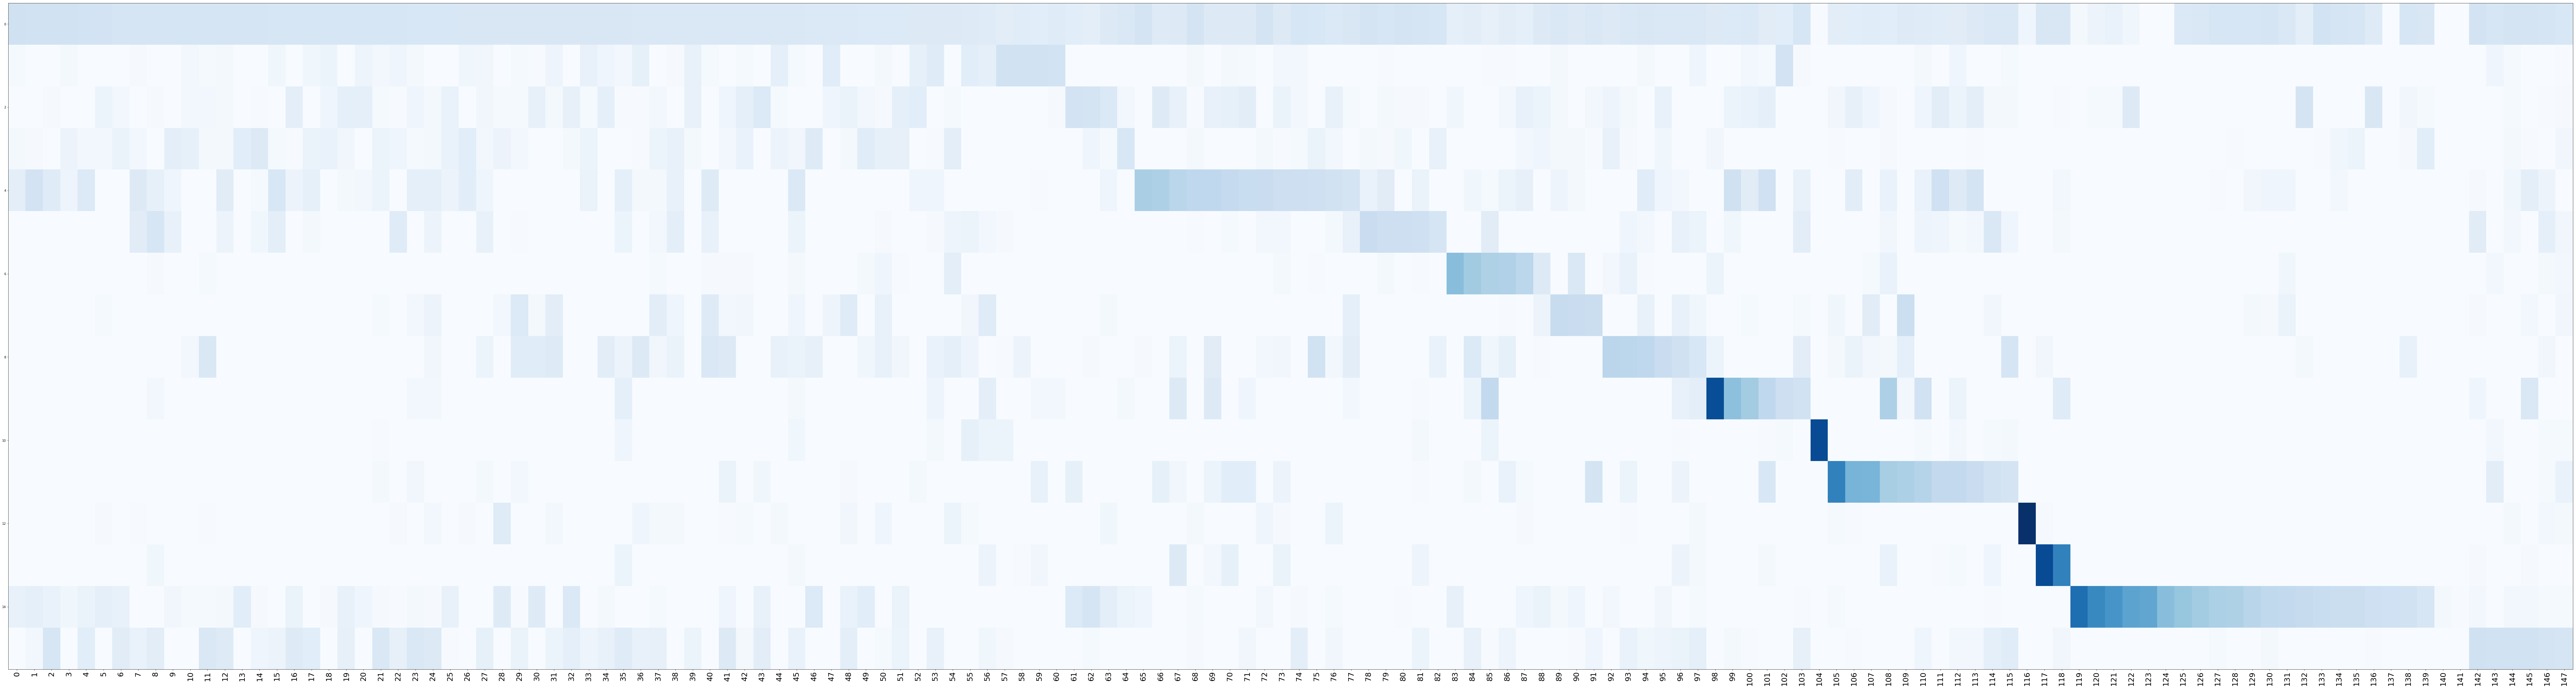

In [16]:
myNMF.make_standard_heatmap_plot( myNMF.Basis.shape[0], myNMF.Basis, 'test.pdf', barsortorder= bar_graph_sort_order)

<Figure size 432x288 with 0 Axes>

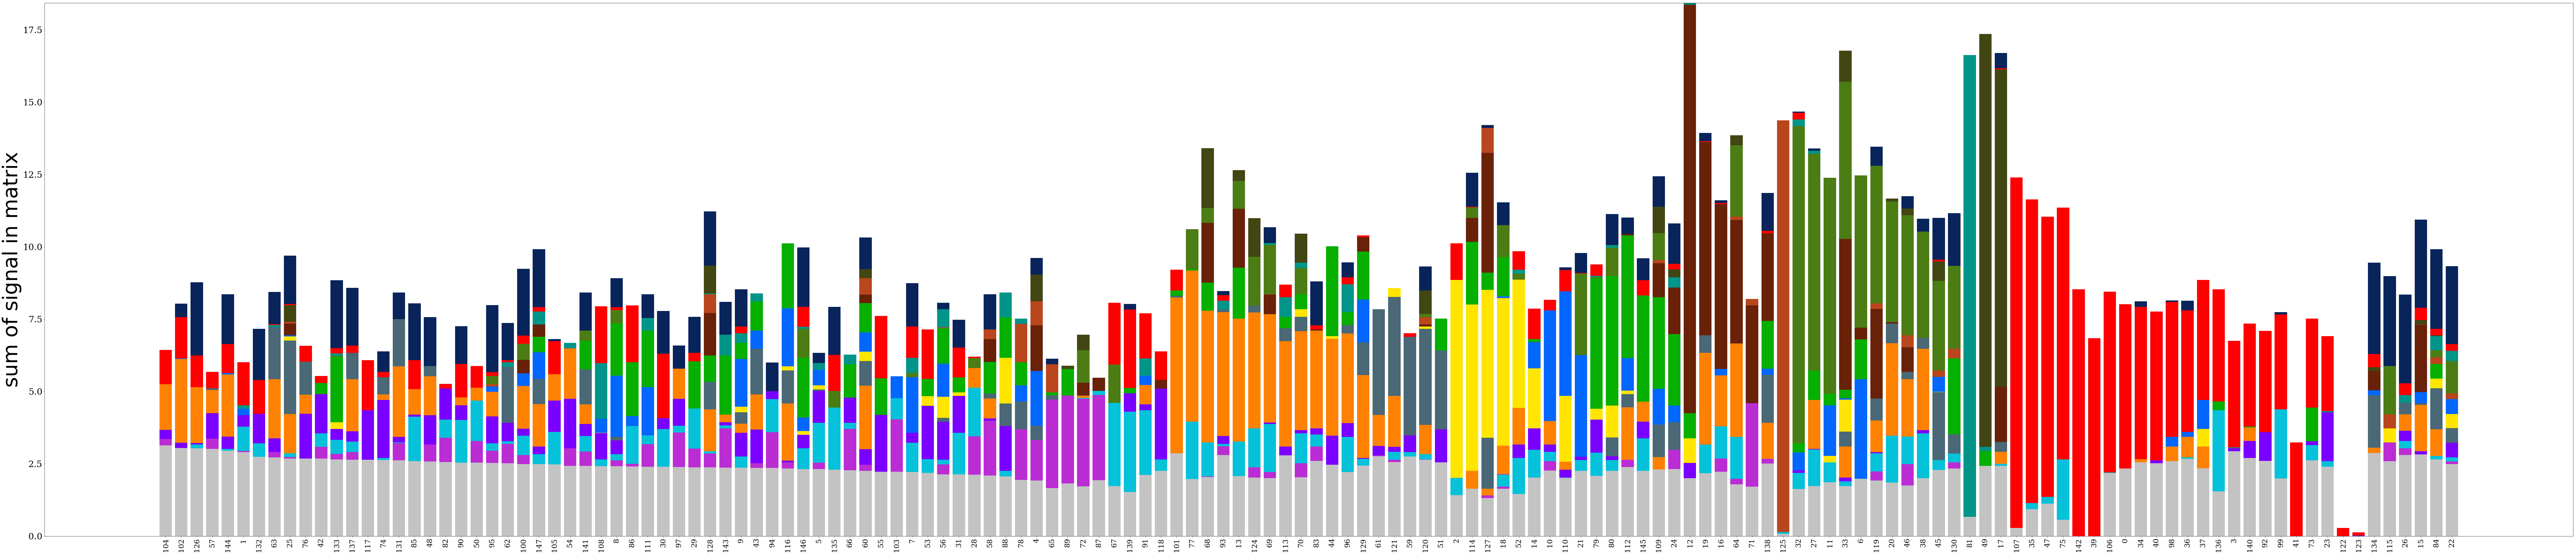

In [17]:
myNMF.make_stacked_bar_plot(myNMF.Basis.shape[0], myNMF.Basis.T, 'test2.pdf', barsortorder=bar_graph_sort_order)

In [18]:
categories = metadata.columns

In [19]:
rosetta = np.arange(myNMF.Basis.shape[0])

In [20]:
interesting_cats = []
for category in categories:
    #print(category, len(metadata[category].value_counts()))
    Ncats = len(metadata[category].value_counts())
    if Ncats > 1 and Ncats < 51:
        interesting_cats.append(category)

In [21]:
interesting_cats

['tissue_culture_extra',
 'sample_prep_date',
 'sample_extra',
 'library_finish_date',
 'library_pcr_cycles',
 'date_completed',
 'project',
 'dnase_units',
 'quality_classification',
 'warnings',
 'median_insert_size']

<Figure size 432x288 with 0 Axes>

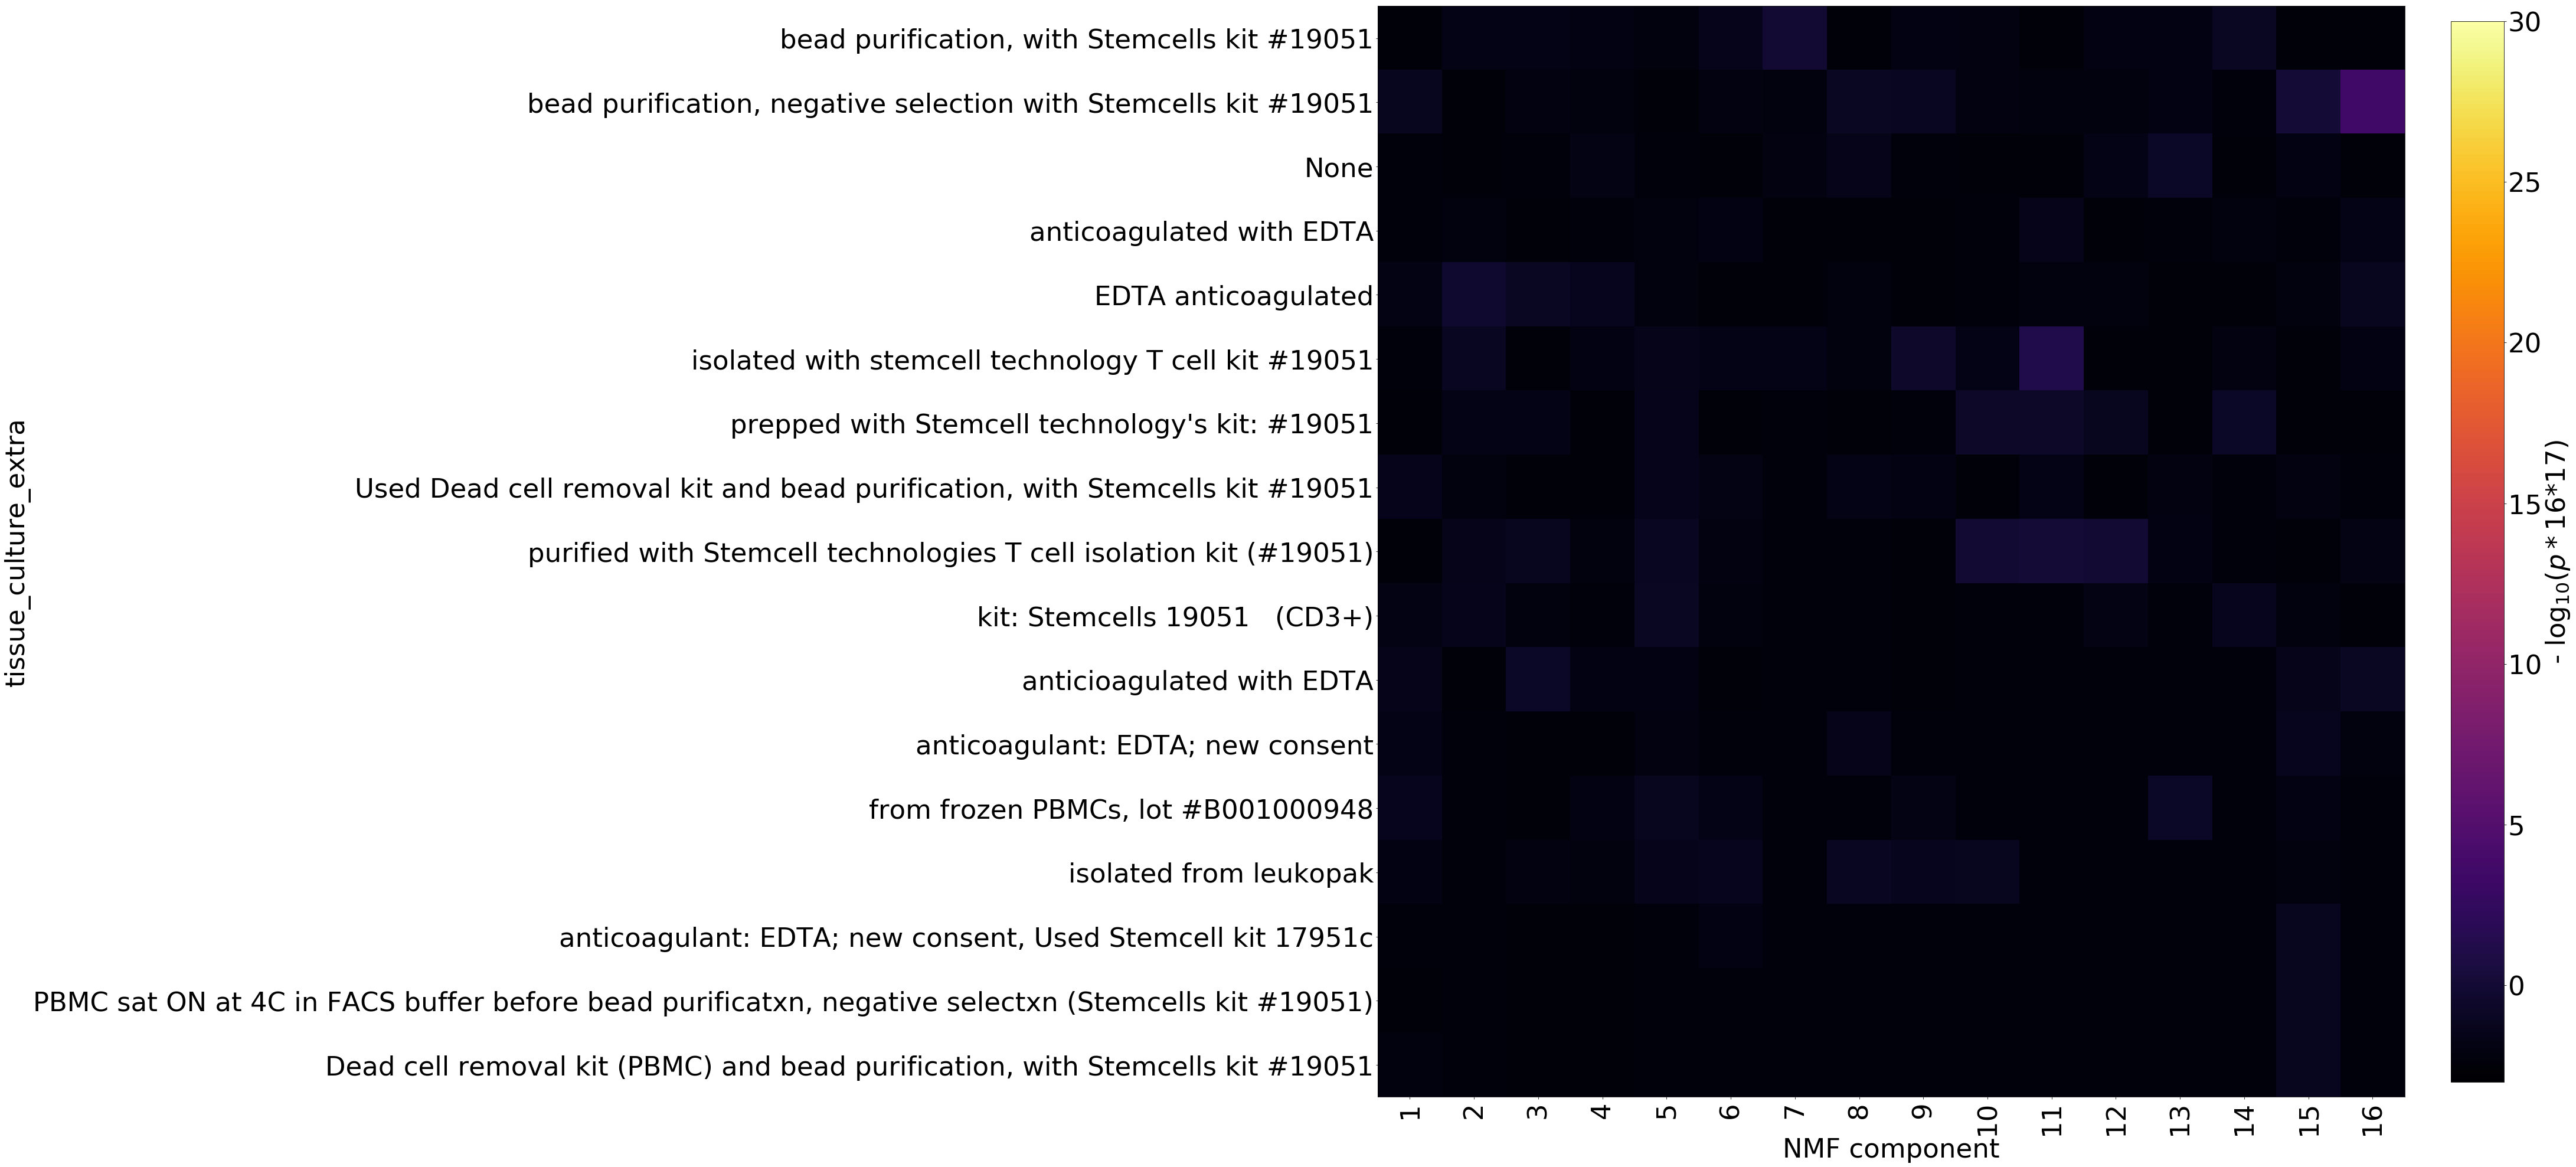

<Figure size 432x288 with 0 Axes>

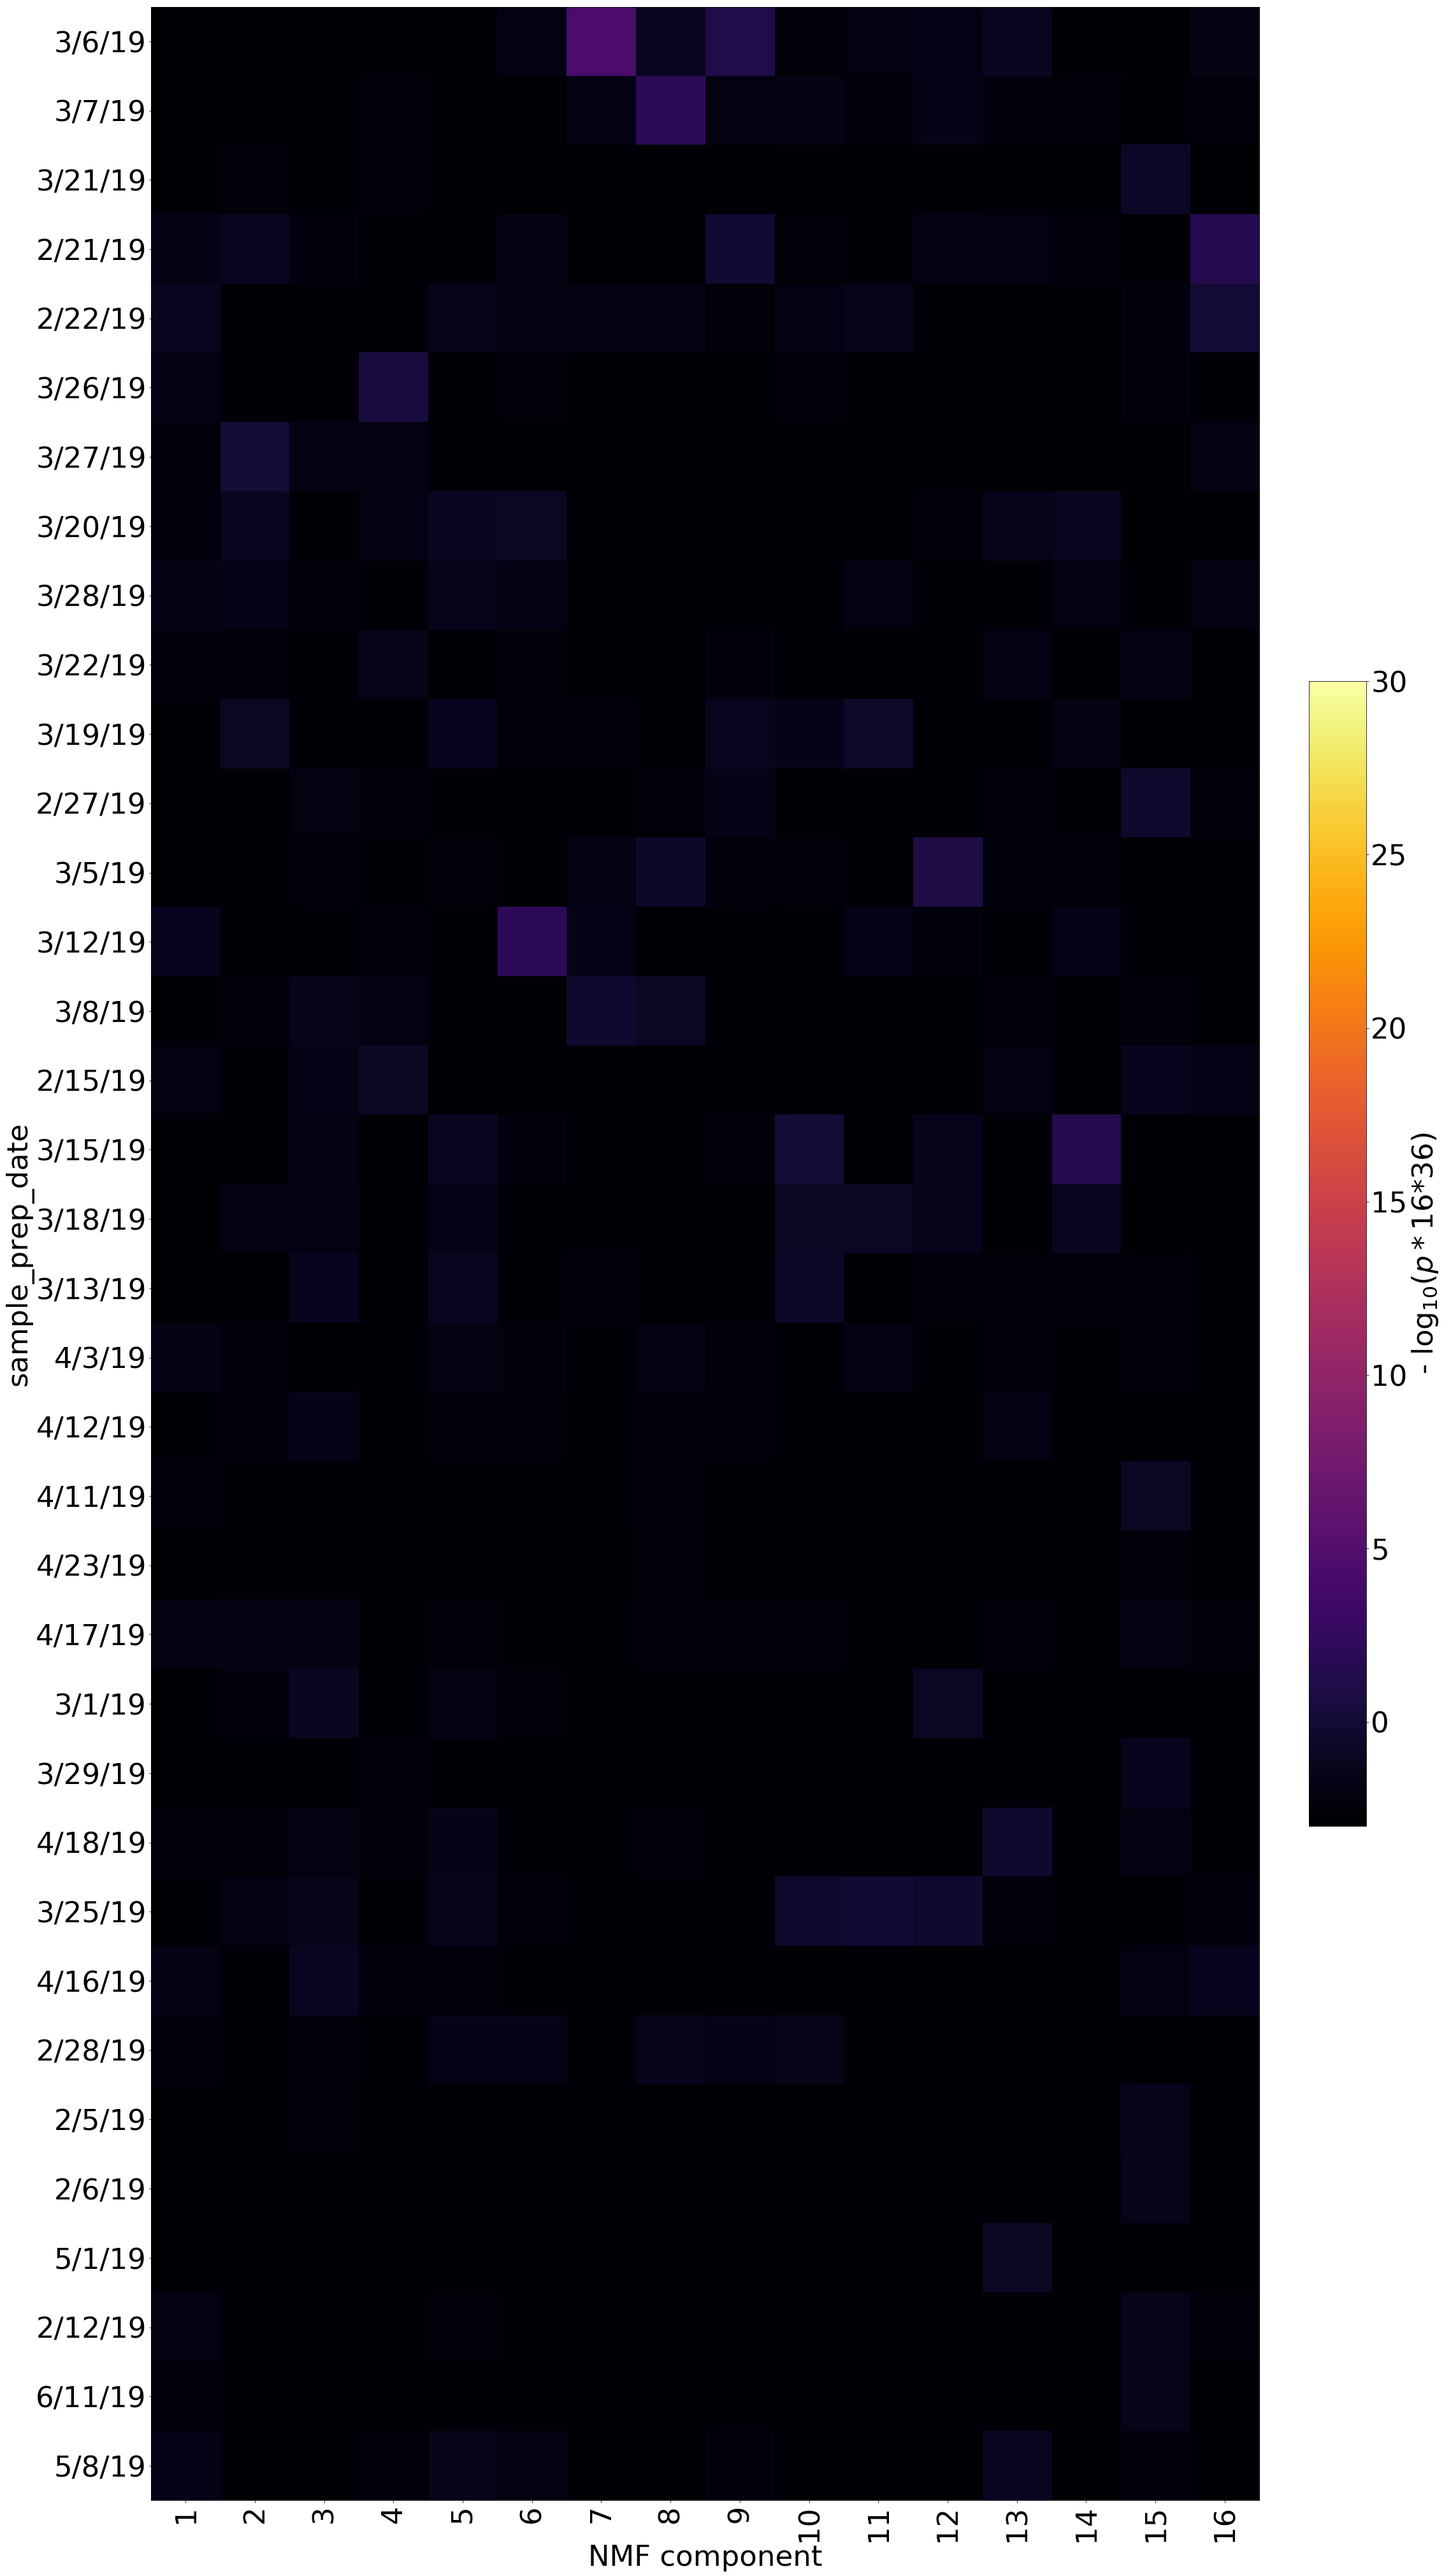

<Figure size 432x288 with 0 Axes>

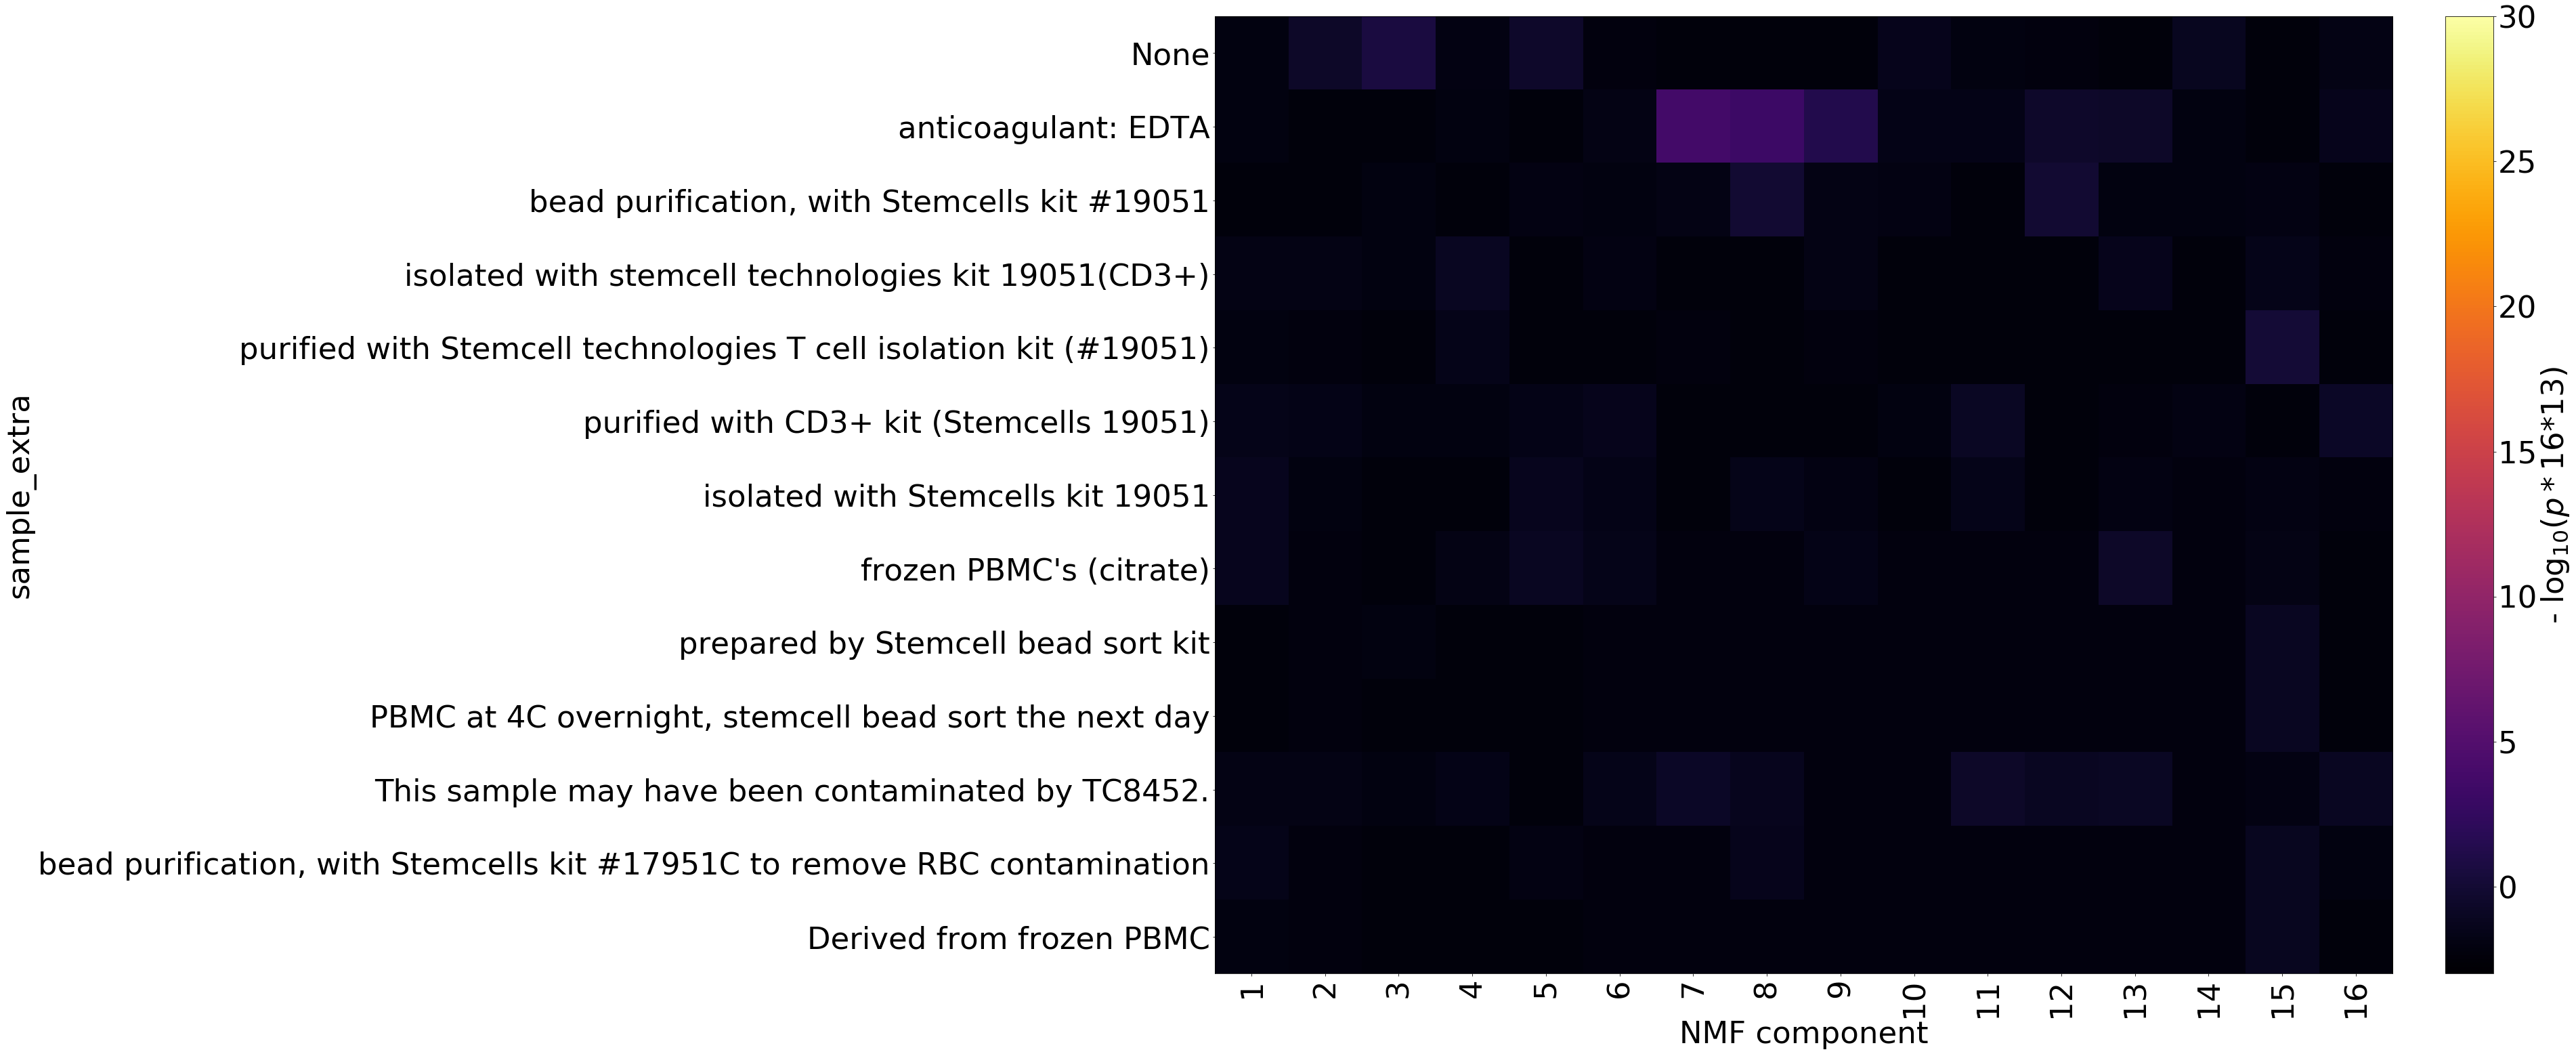

<Figure size 432x288 with 0 Axes>

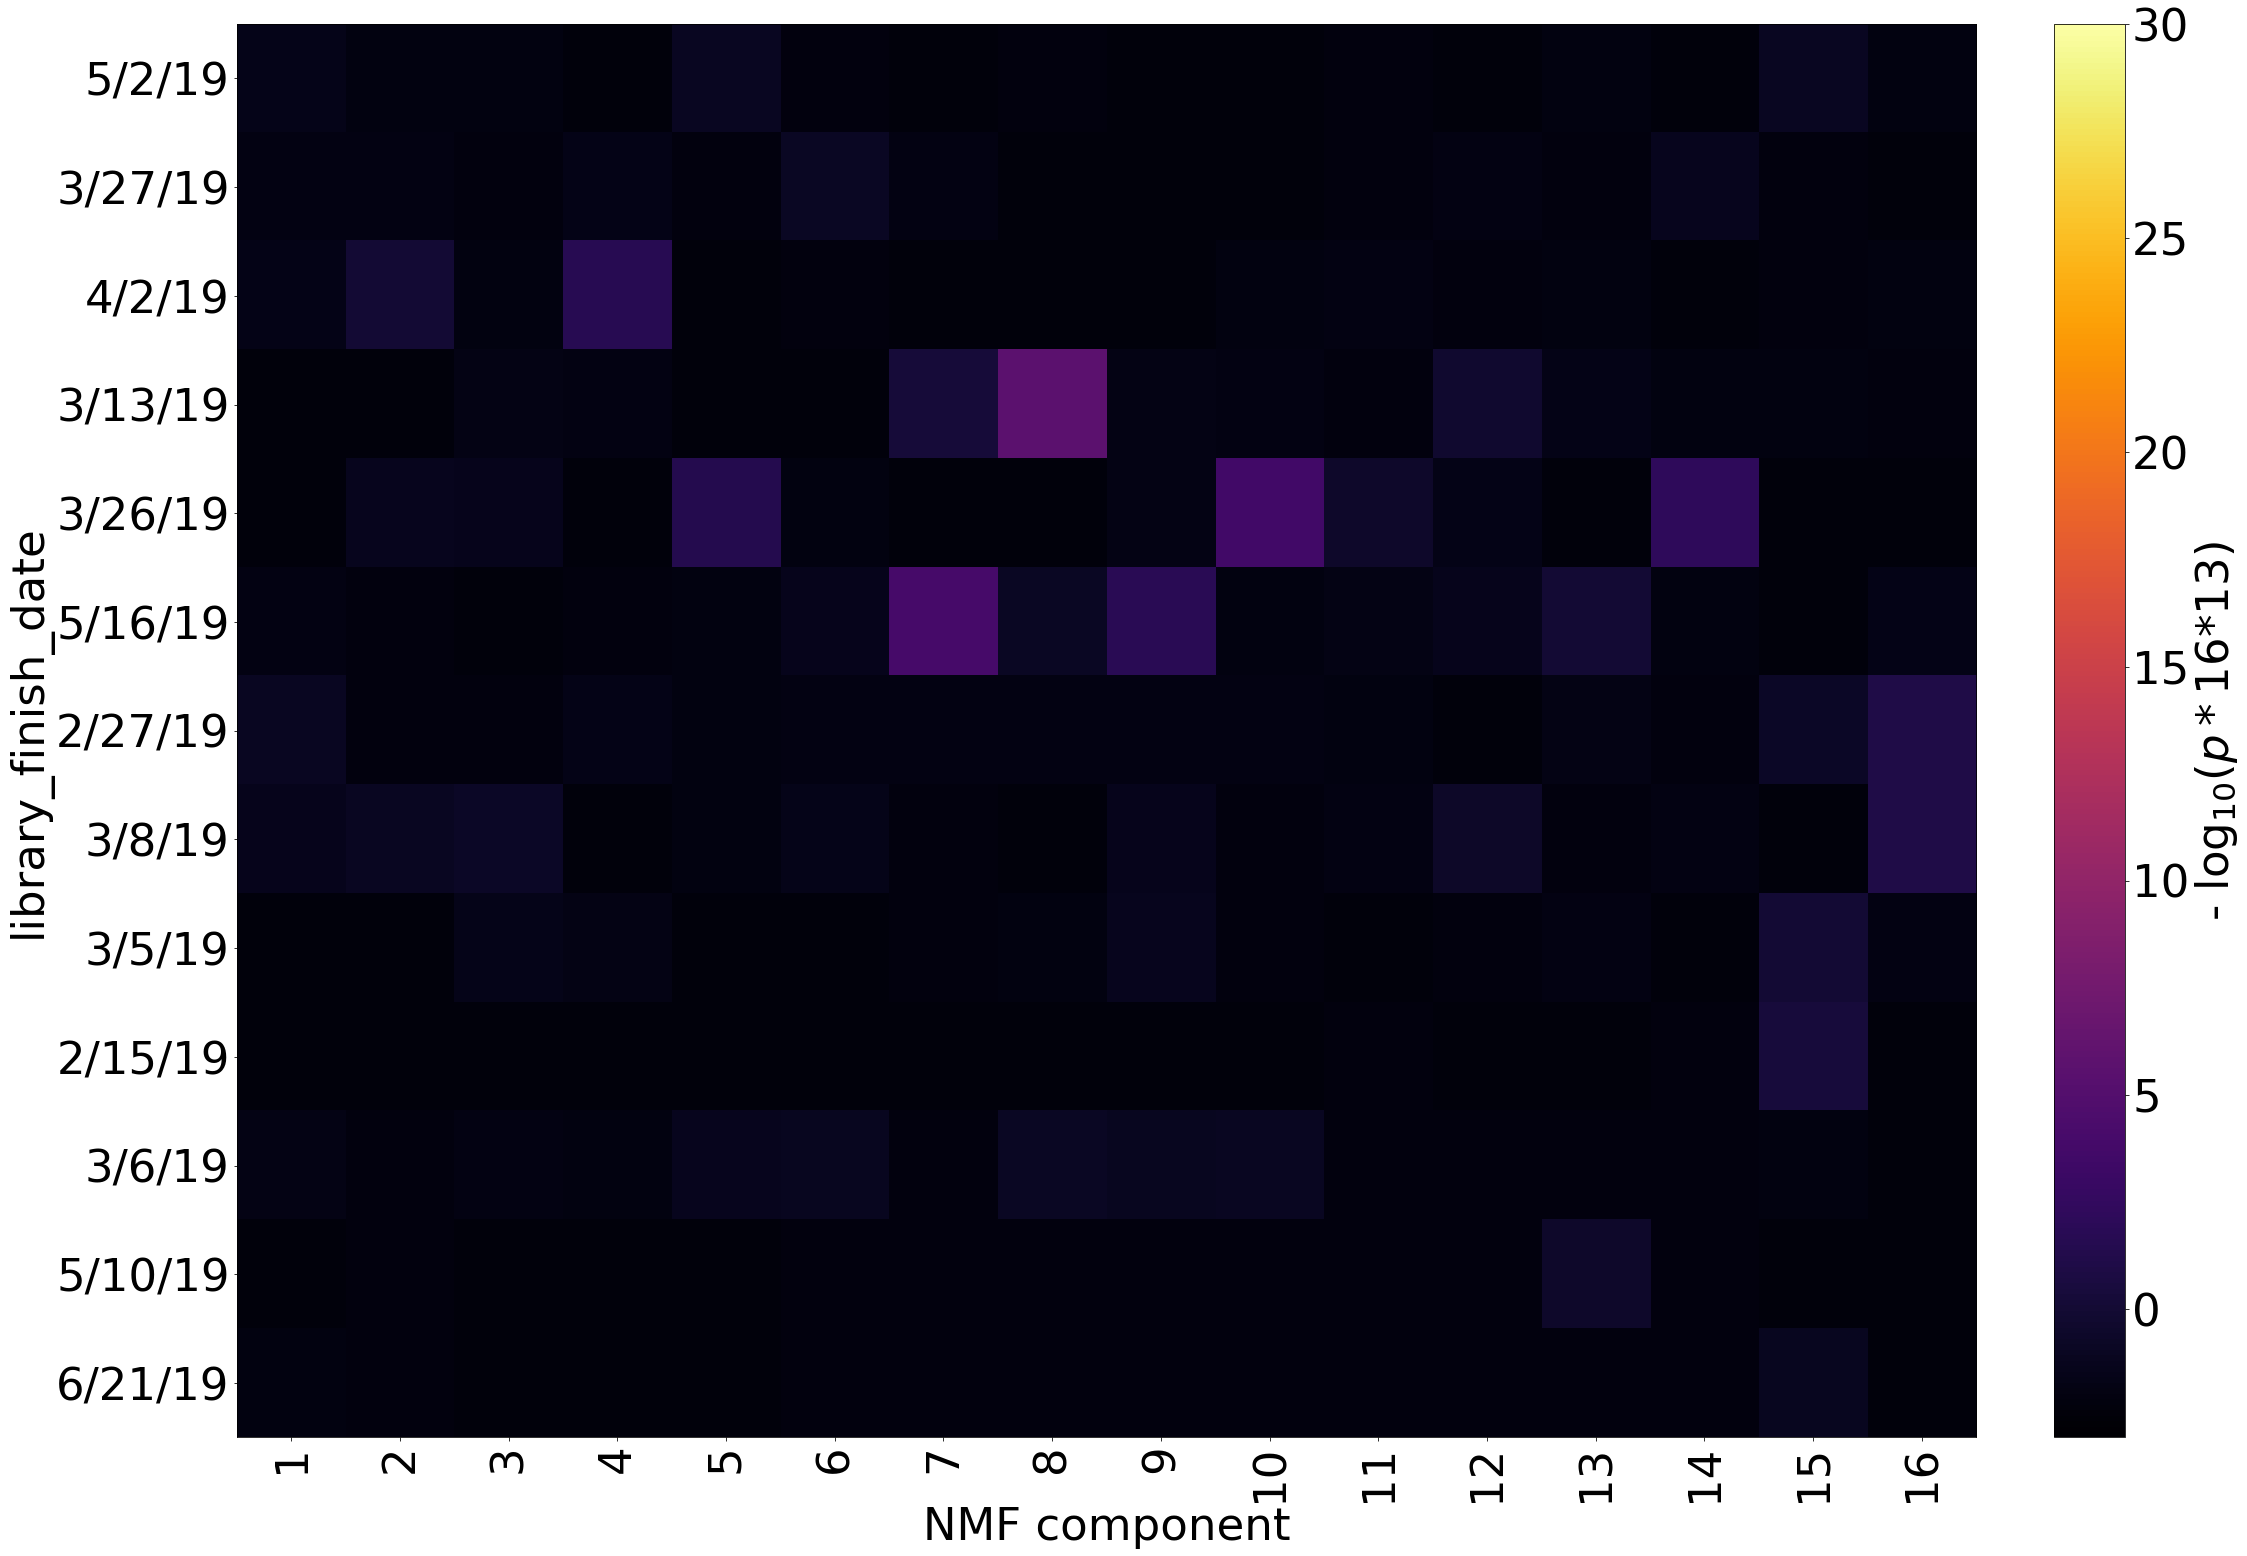

<Figure size 432x288 with 0 Axes>

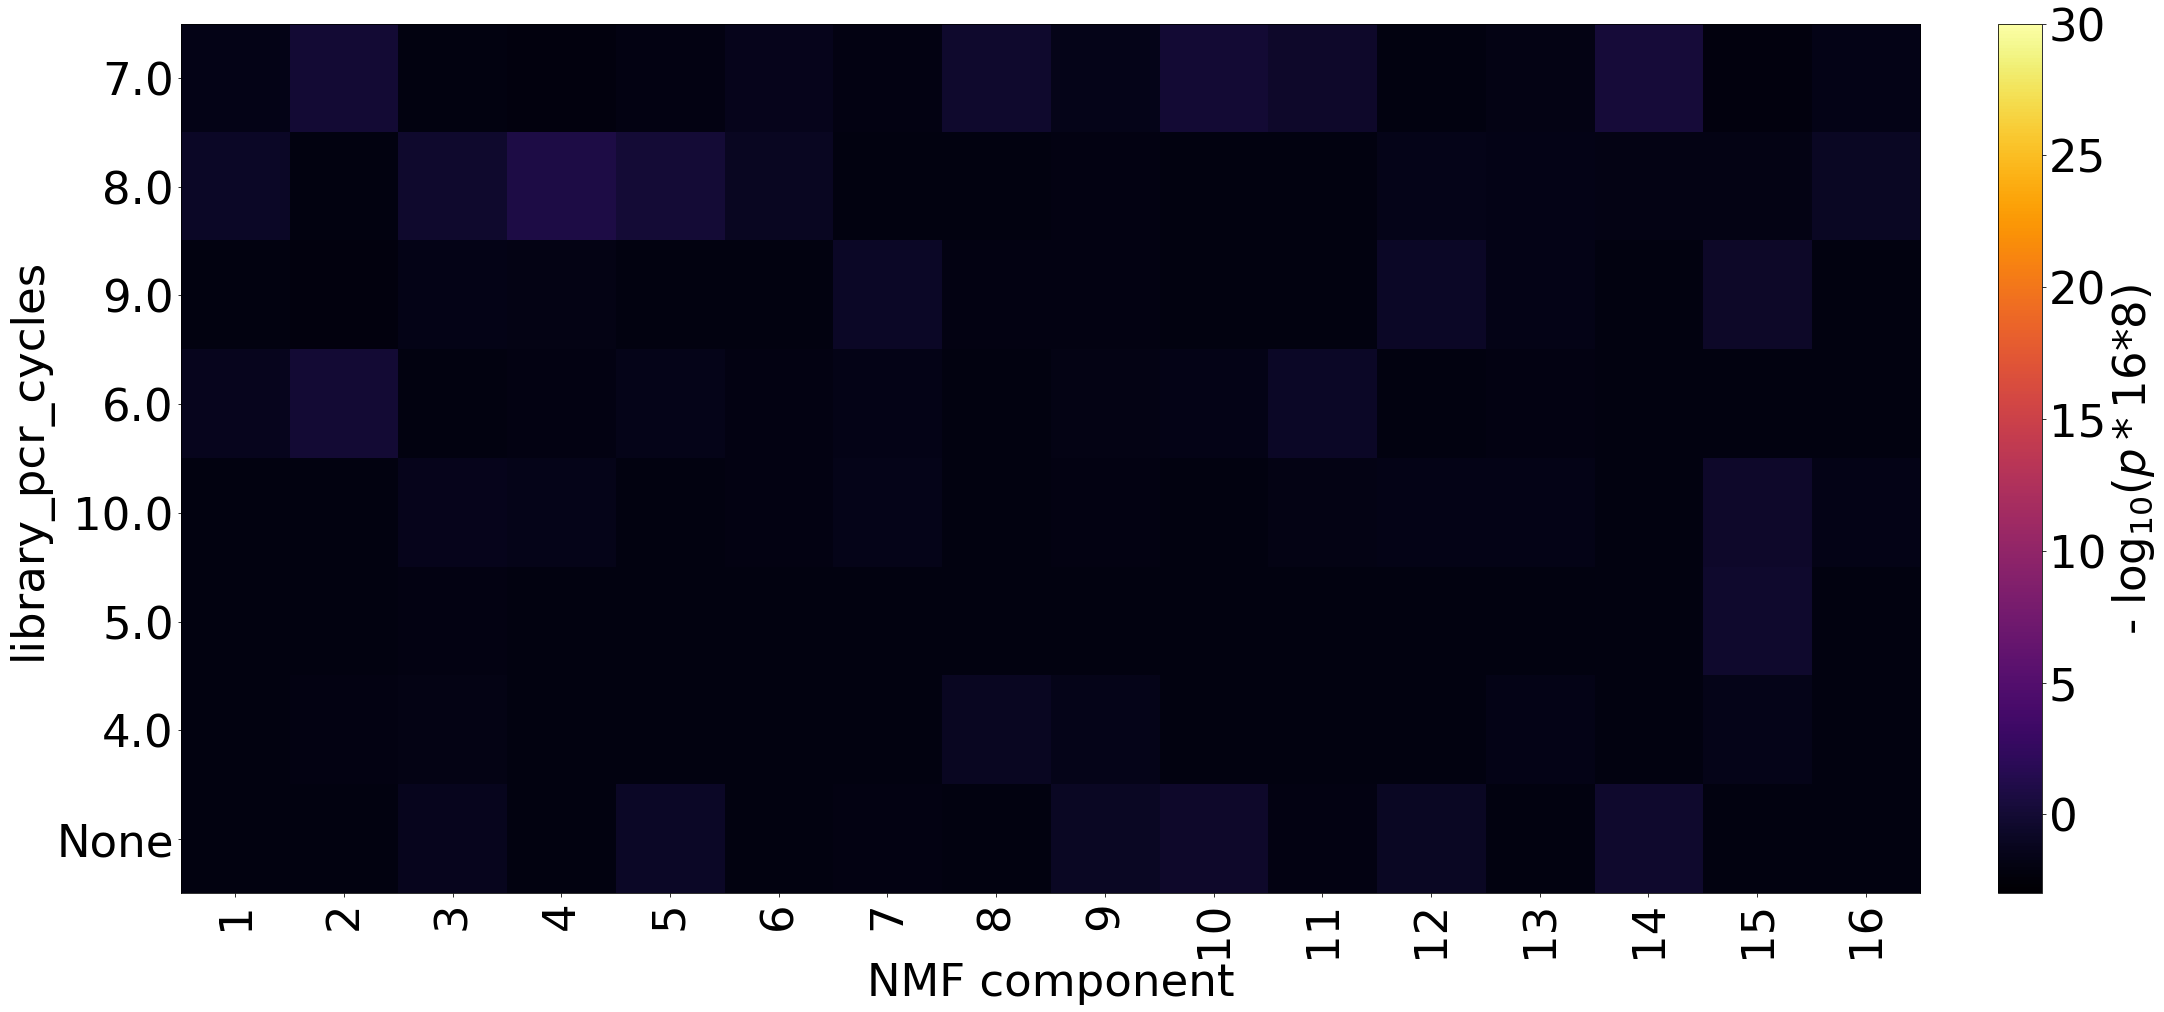

<Figure size 432x288 with 0 Axes>

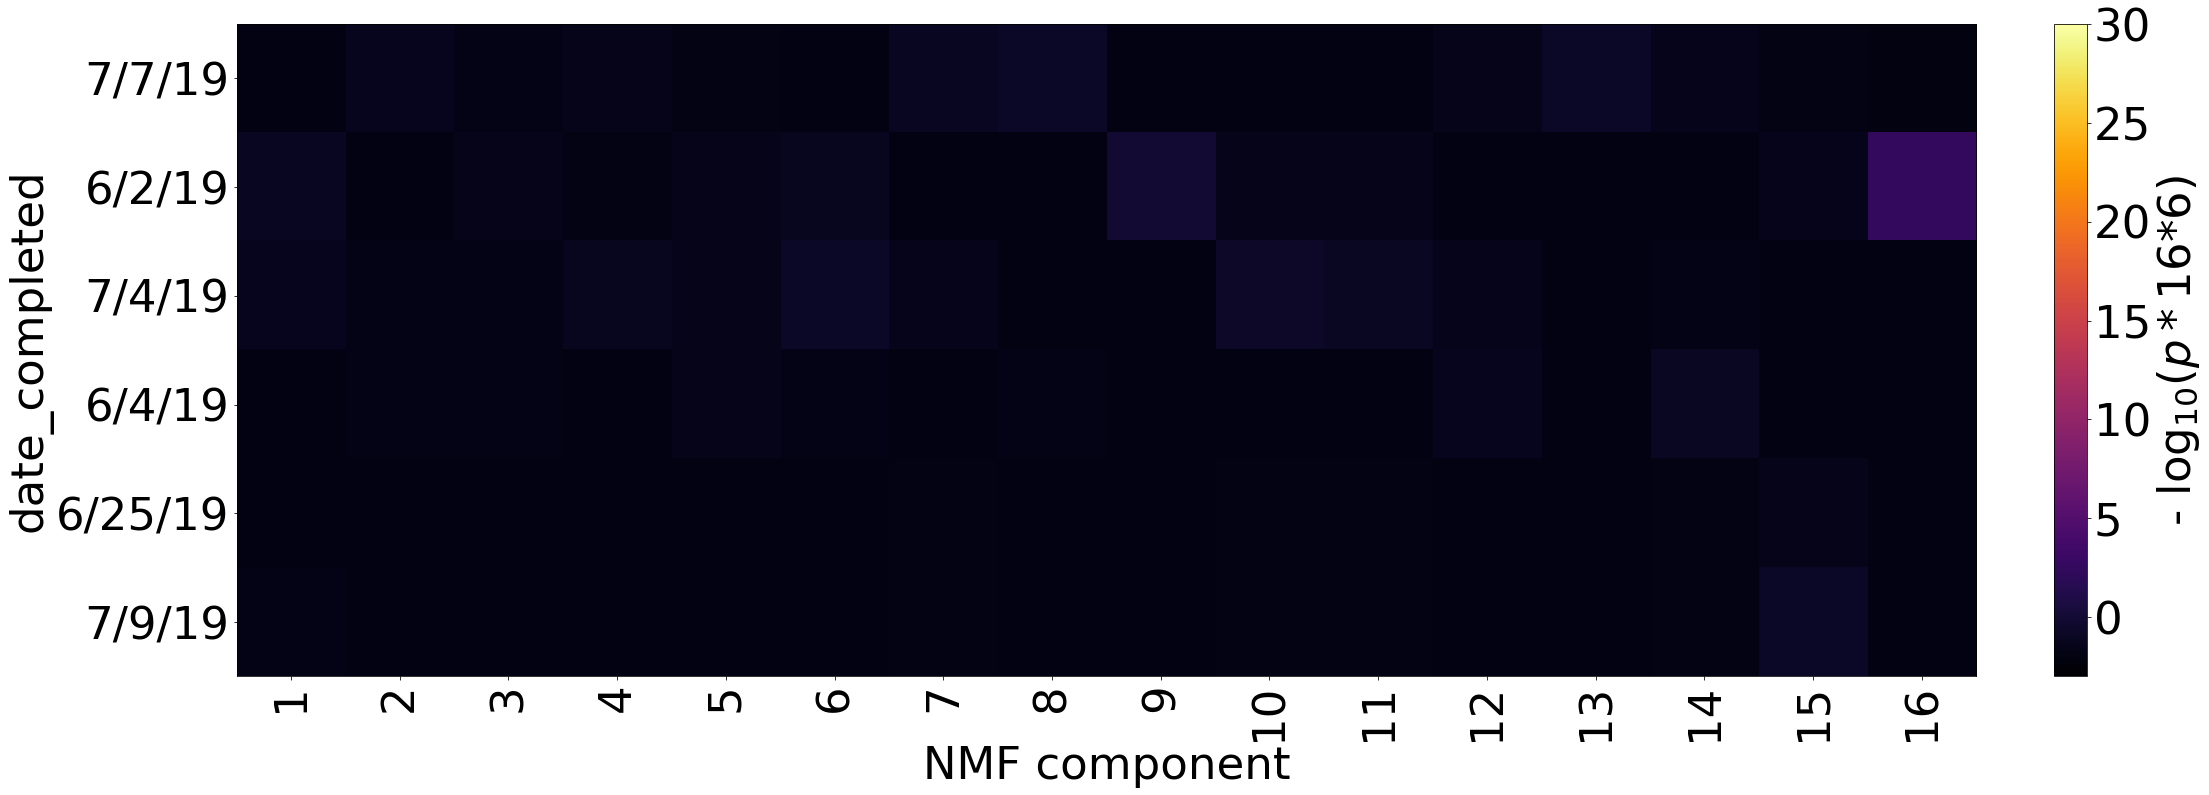

<Figure size 432x288 with 0 Axes>

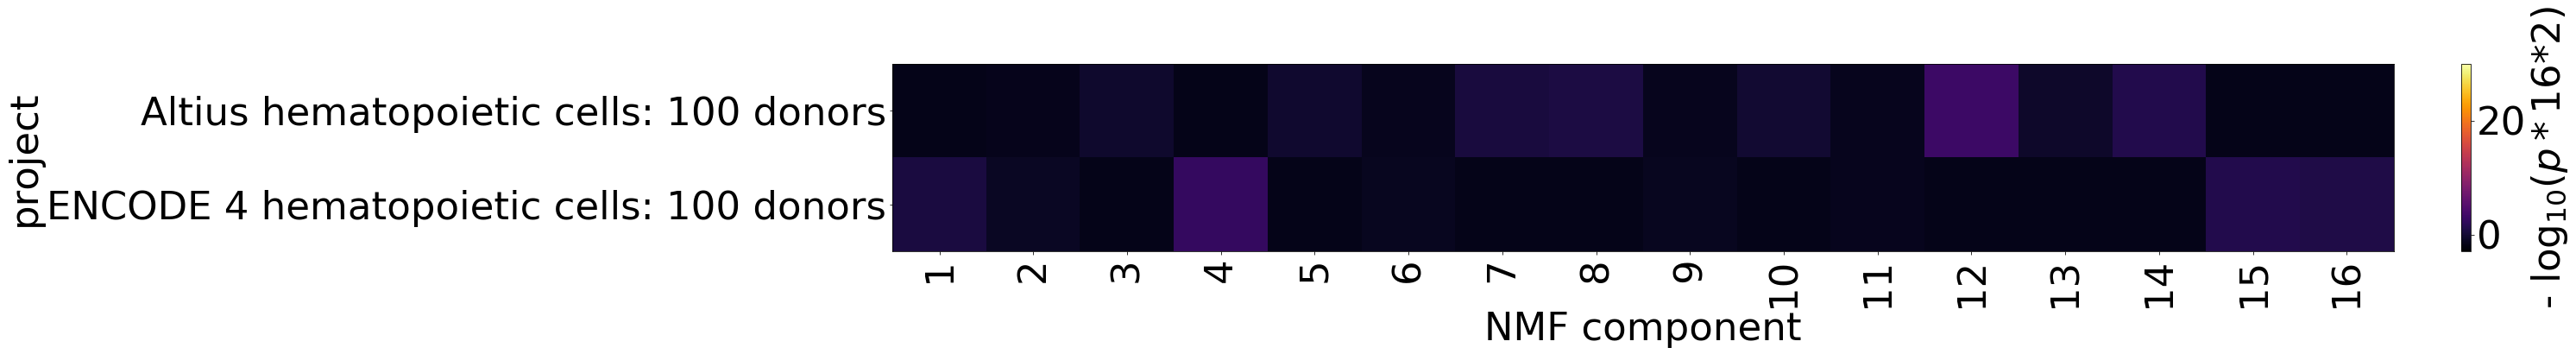

<Figure size 432x288 with 0 Axes>

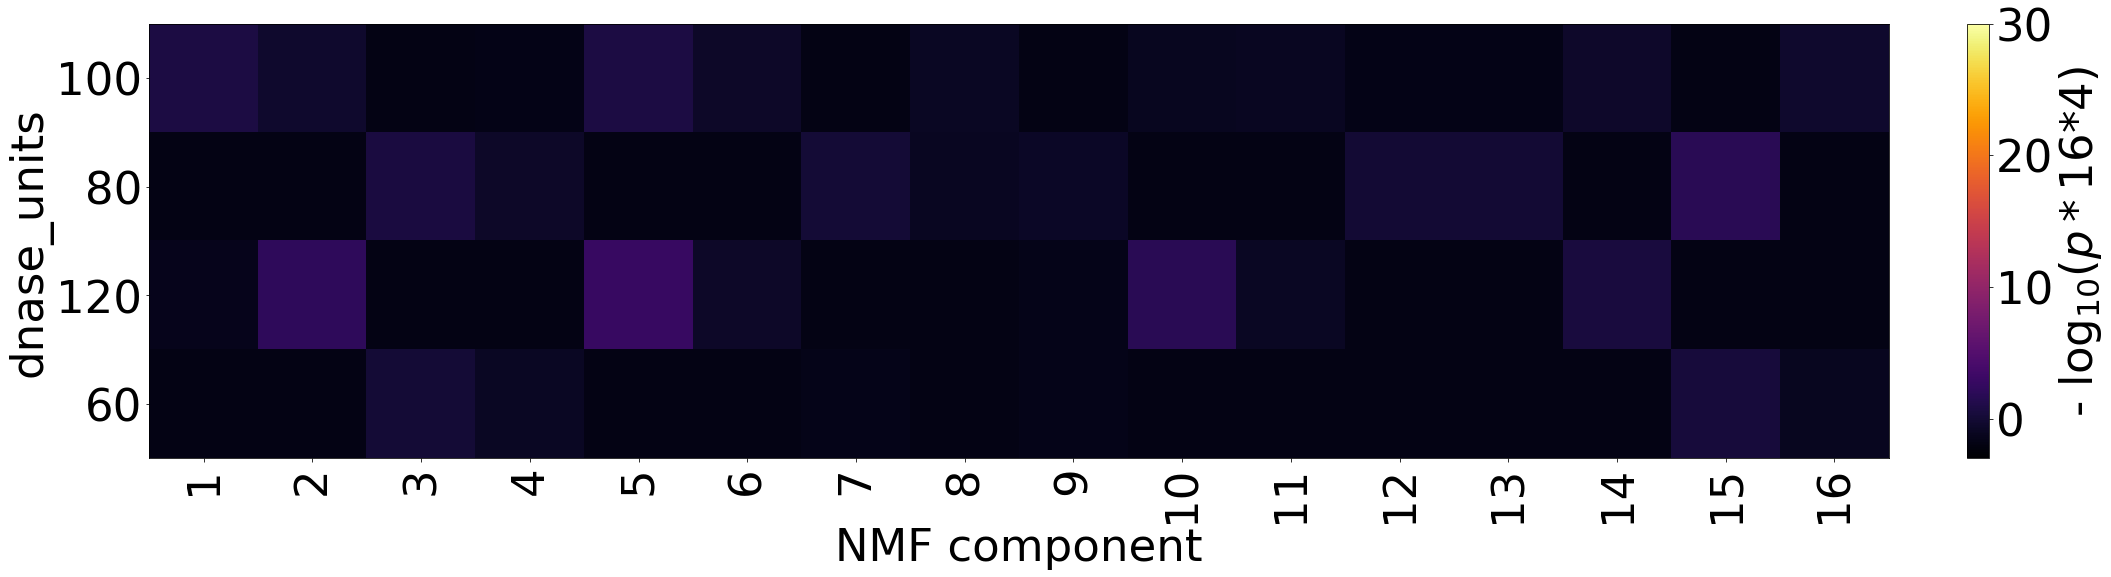

<Figure size 432x288 with 0 Axes>

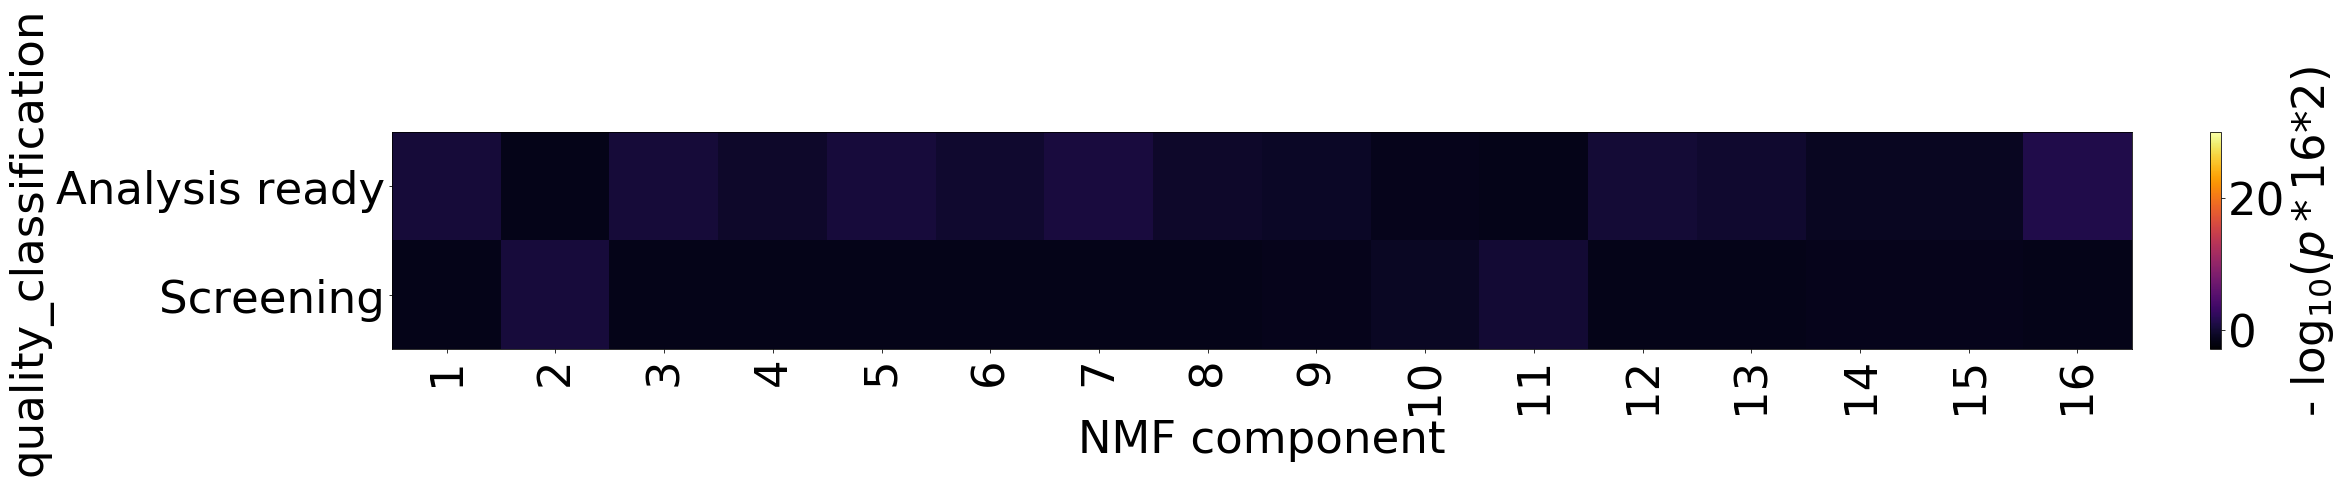

<Figure size 432x288 with 0 Axes>

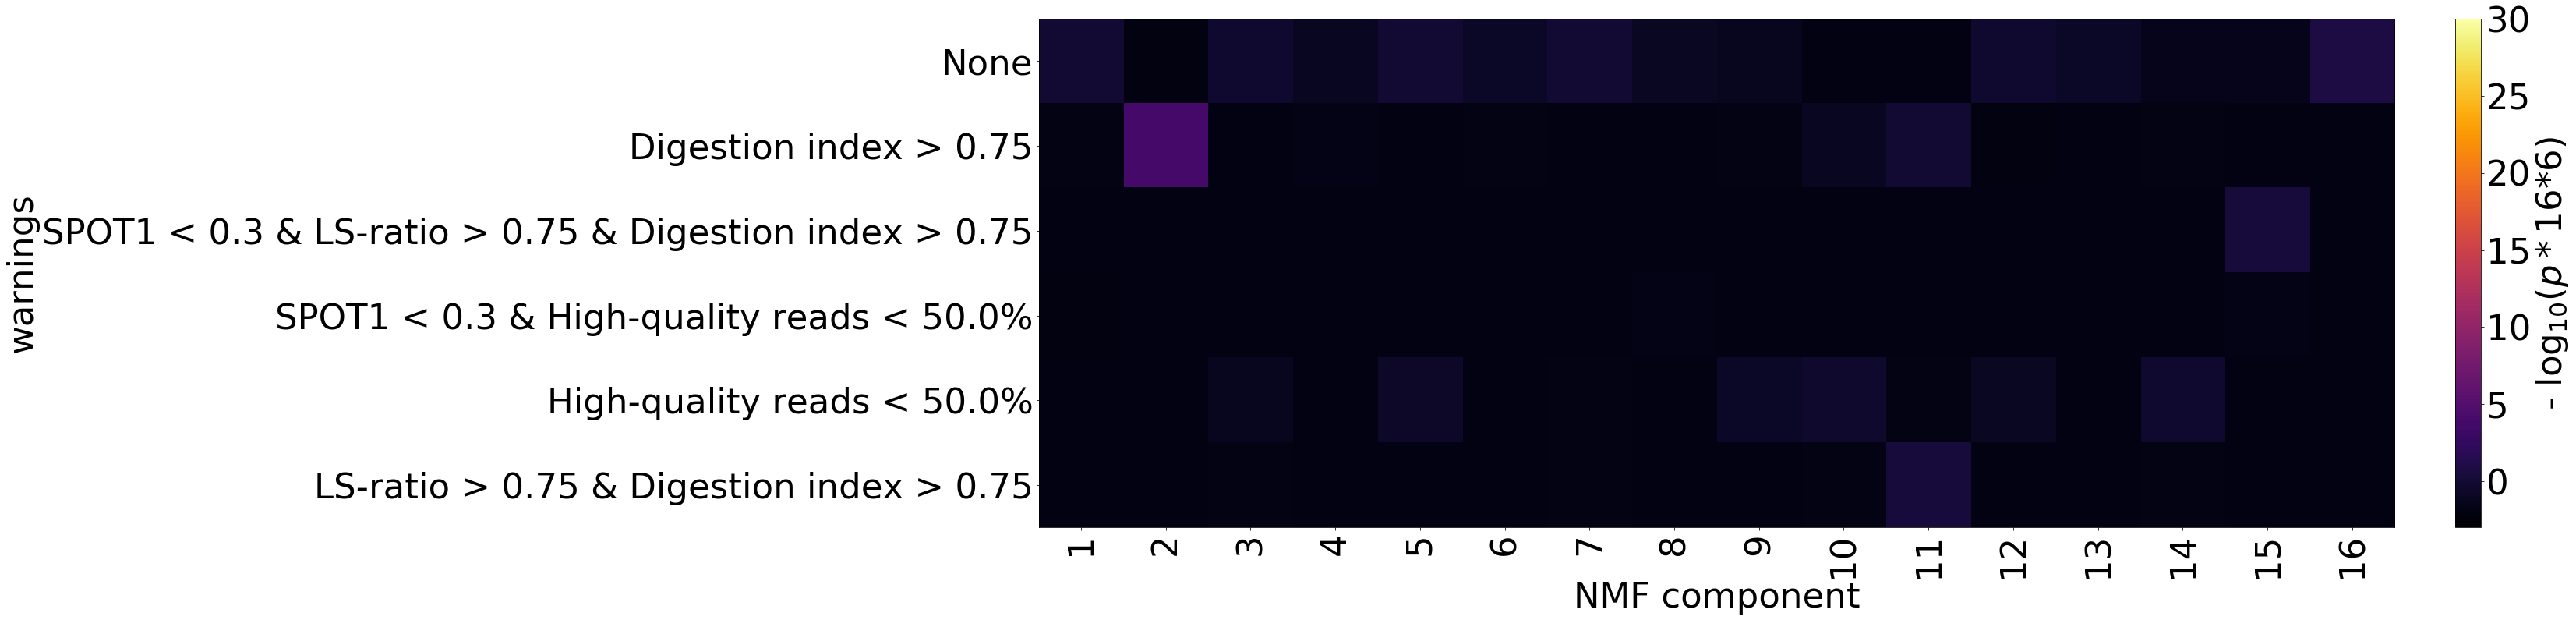

<Figure size 432x288 with 0 Axes>

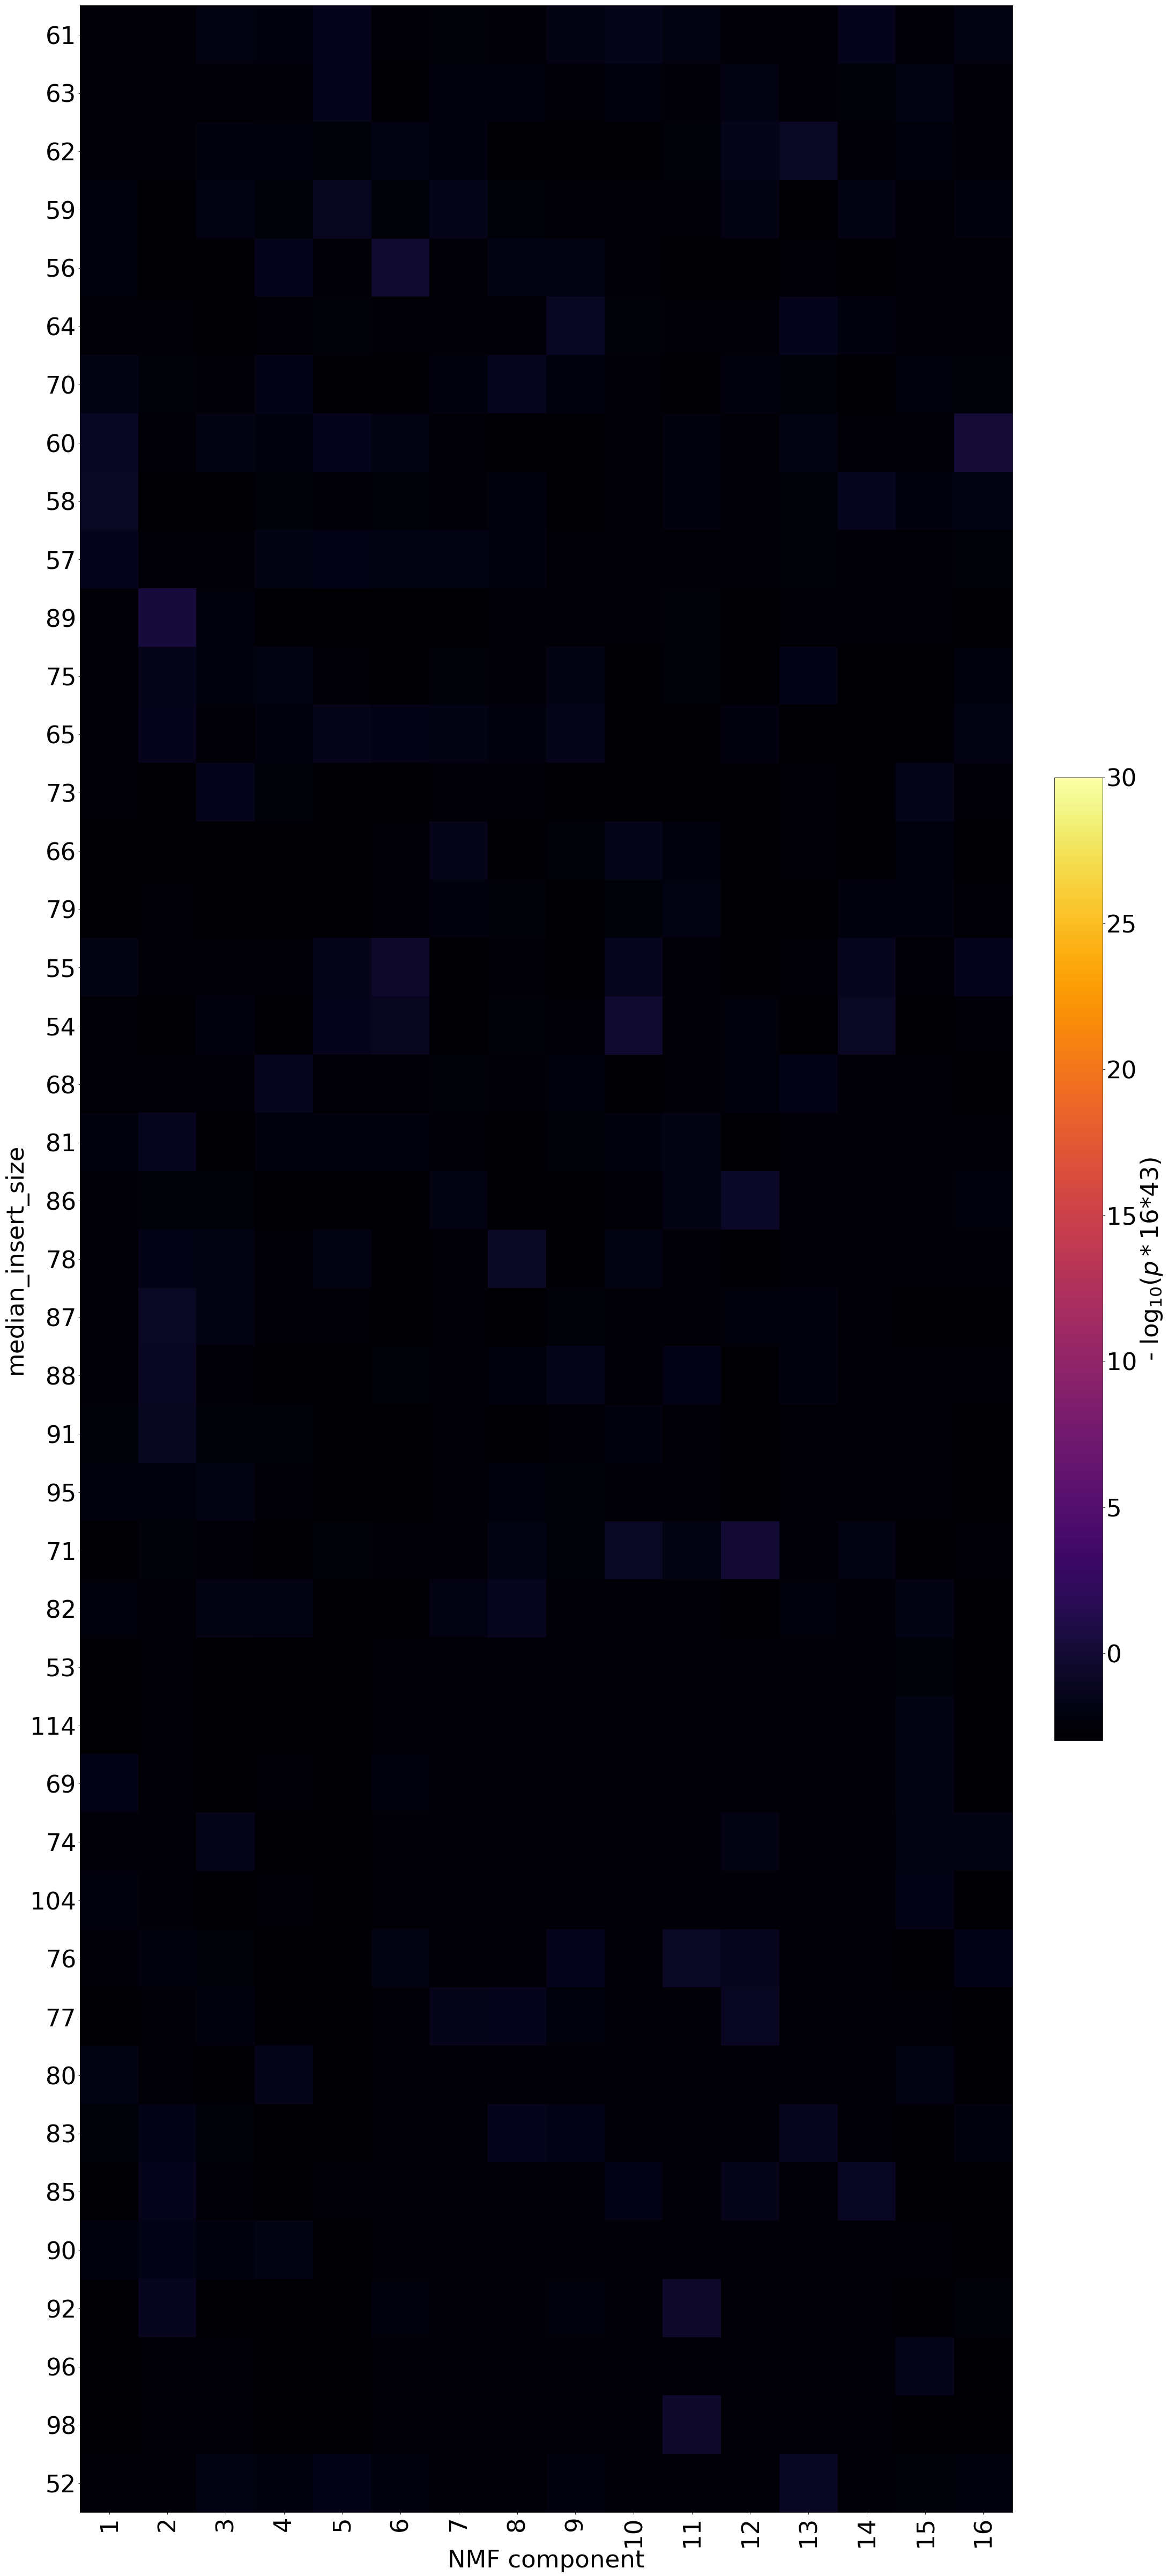

In [22]:
for my_cat_str in interesting_cats:
    metadata[my_cat_str].fillna('None', inplace=True)
    (SystemChart,SystemTypes) = OMD.make_significance_plot(metadata, myNMF.Basis, my_cat_str, rosetta,thecmap='inferno', NMFCOMPS=16,filename_addon='', write_mode=False, verbose=False, maxcats=50)


In [23]:
metadata.dtypes.value_counts()

object     40
int64      12
float64    10
dtype: int64

In [24]:
non_object_cats = (metadata.dtypes != 'object')

In [25]:
len(non_object_cats[non_object_cats])

22

In [35]:
non_object_cats[non_object_cats].keys().values

array(['sample_timepoint', 'sample_factors', 'treatment', 'dnase_units',
       'nuclei_count', 'total_reads', 'mapping_nuclear',
       'mapping_non_nuclear', 'non_mapping_adapter', 'non_mapping_other',
       'hotspot1_SPOT', 'hotspot2_SPOT', 'number_hotspots',
       'genomic_area_hotspots', 'dhsindex_WM20180608b_differential_peaks',
       'preseq_est_max', 'adapter_trimmed', 'umi_method',
       'median_insert_size', 'insert_ls_ratio', 'library_ls_ratio',
       'insert_fourier_transform_11'], dtype=object)

In [49]:
myNMF.normalize_matrices()

In [52]:
 from scipy.stats import linregress

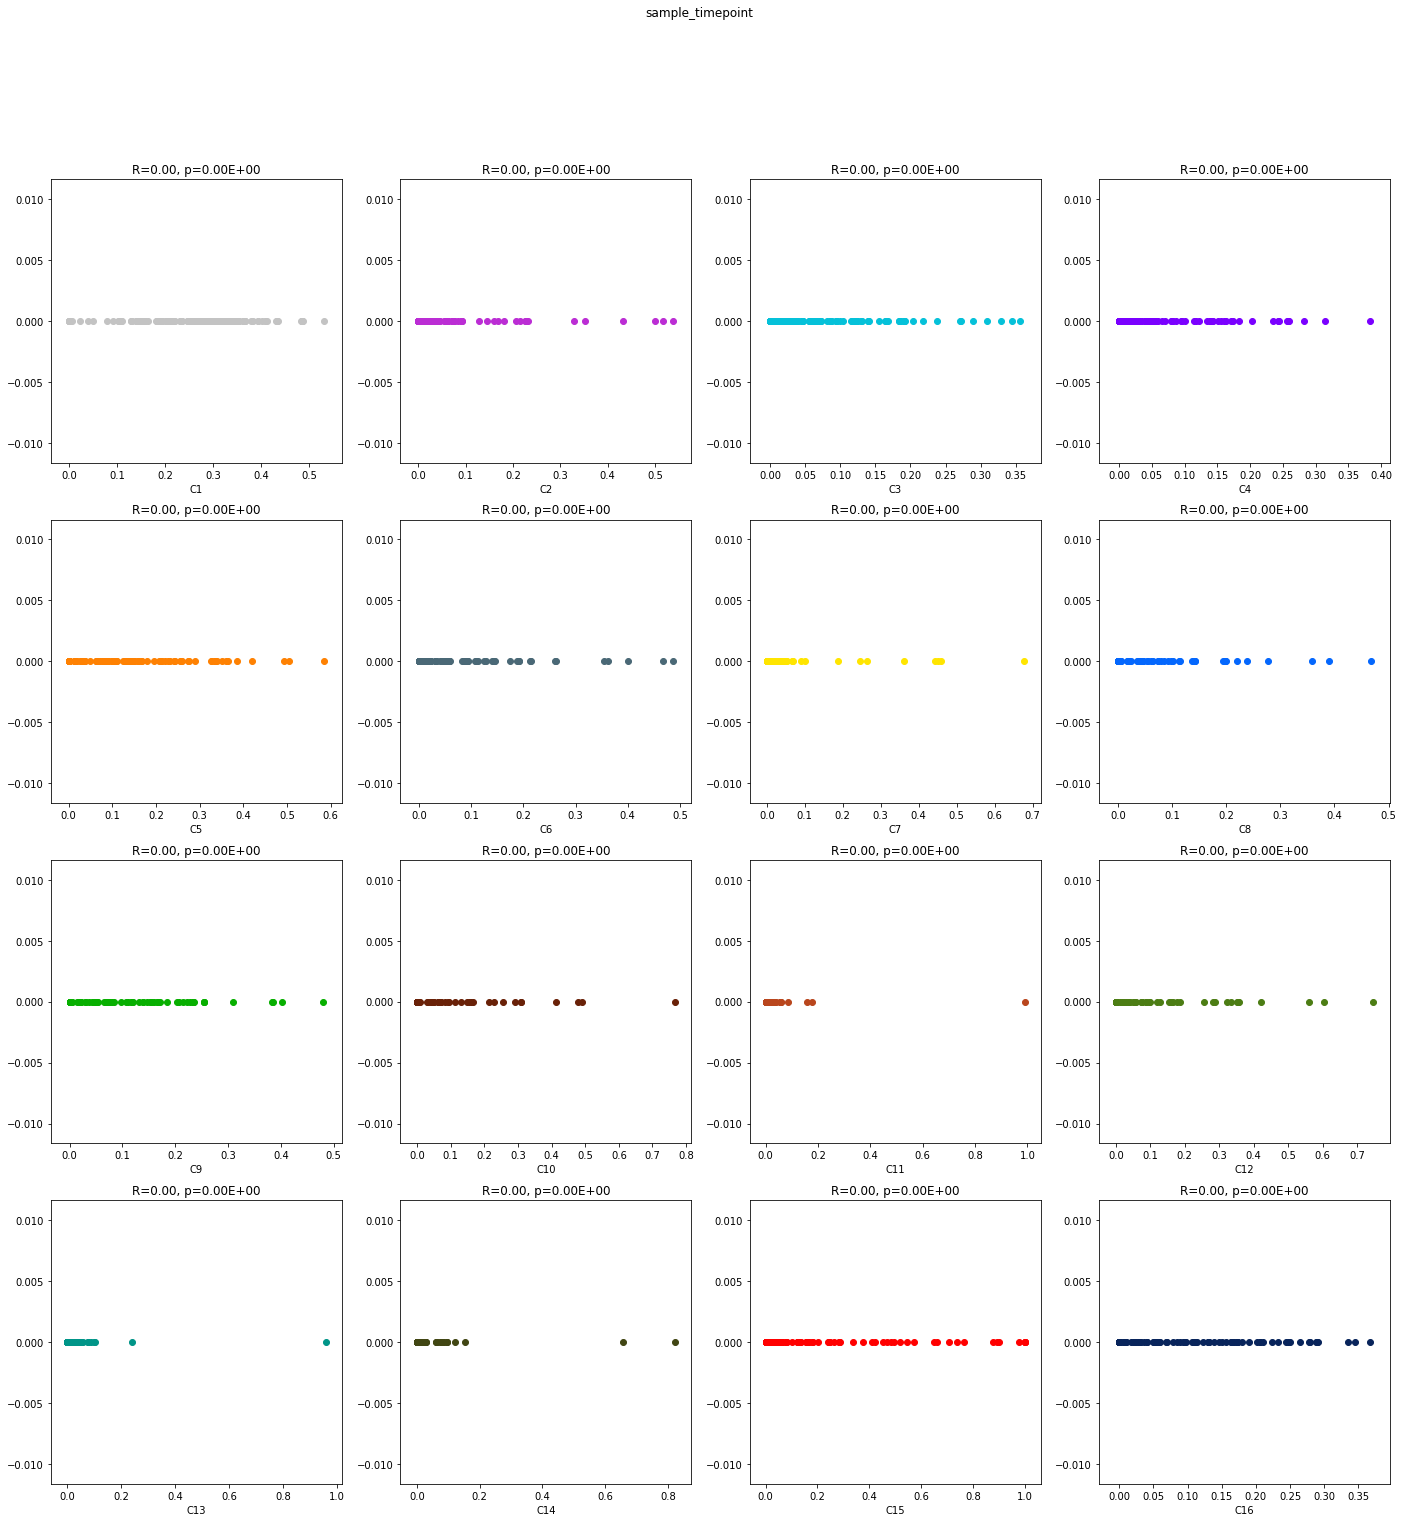

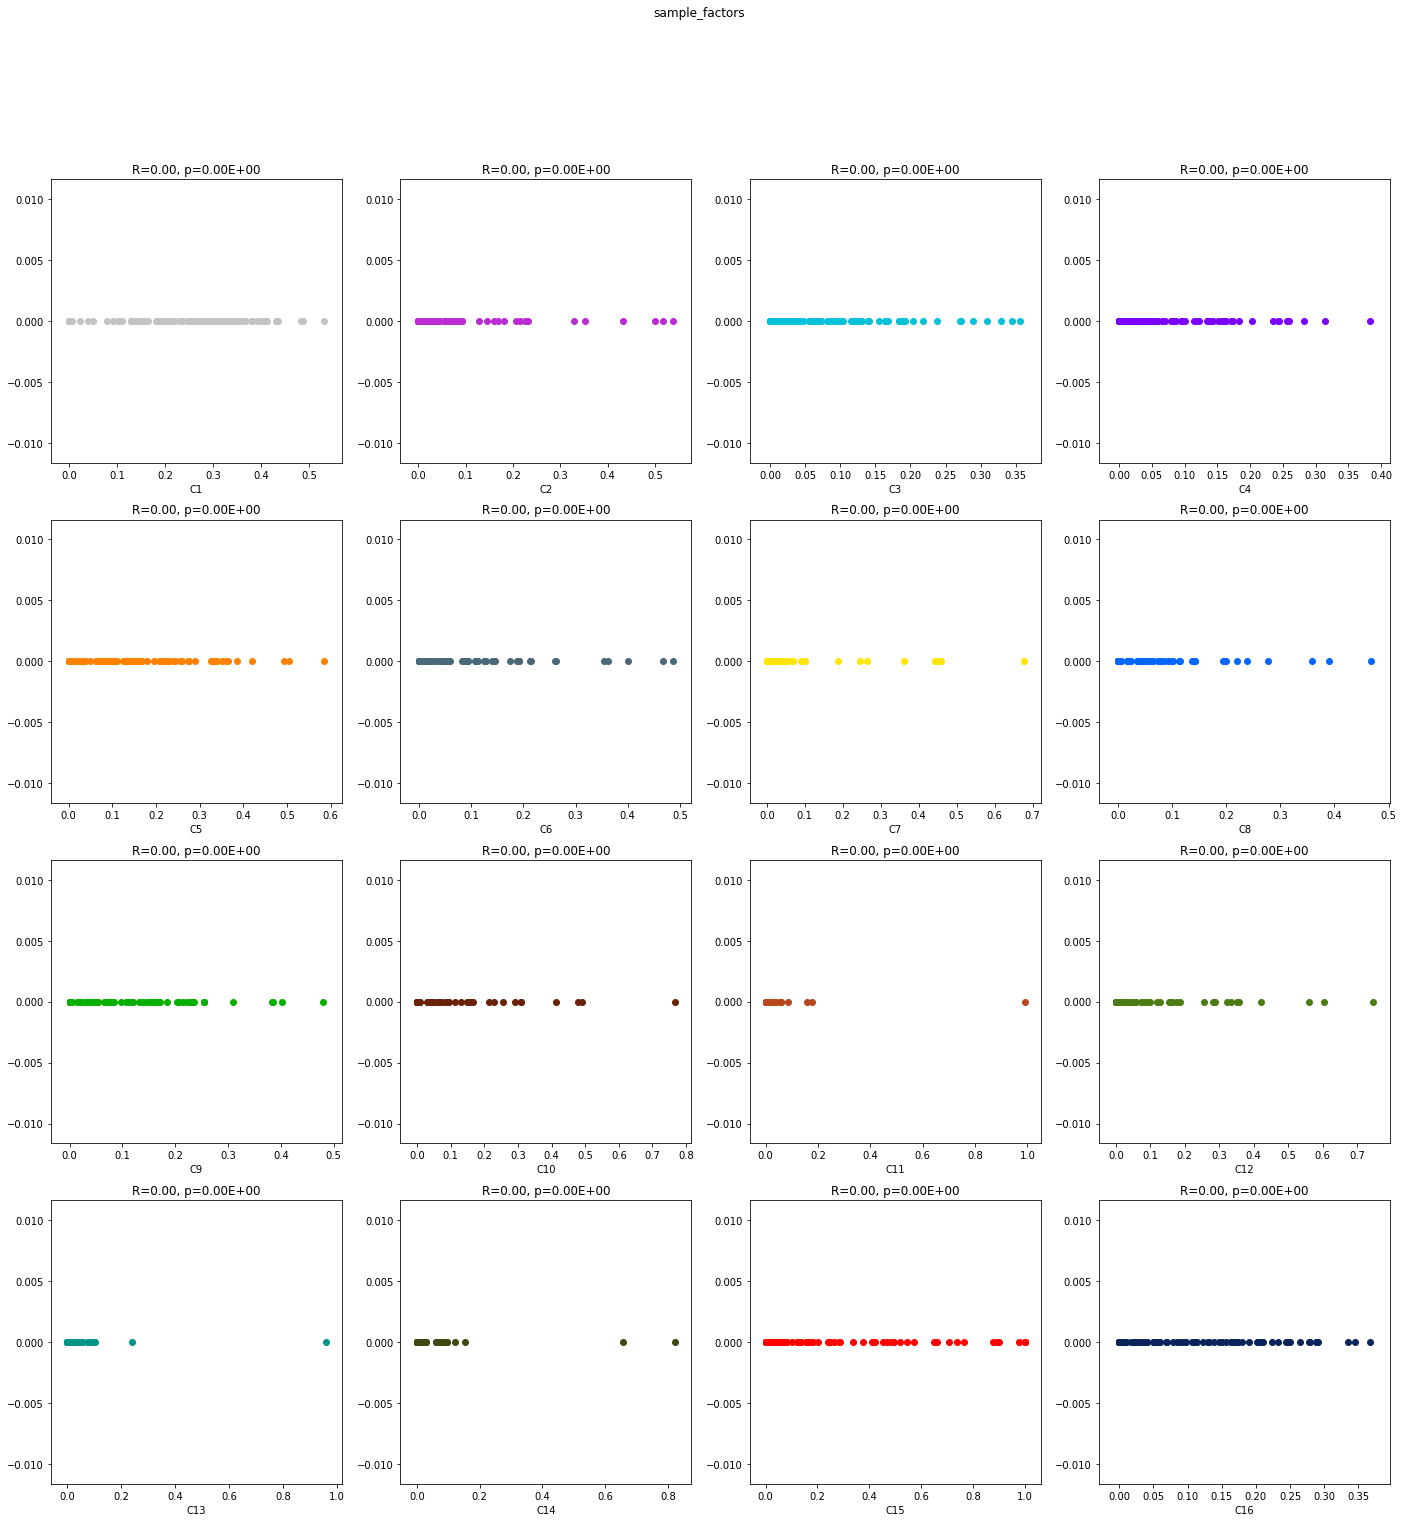

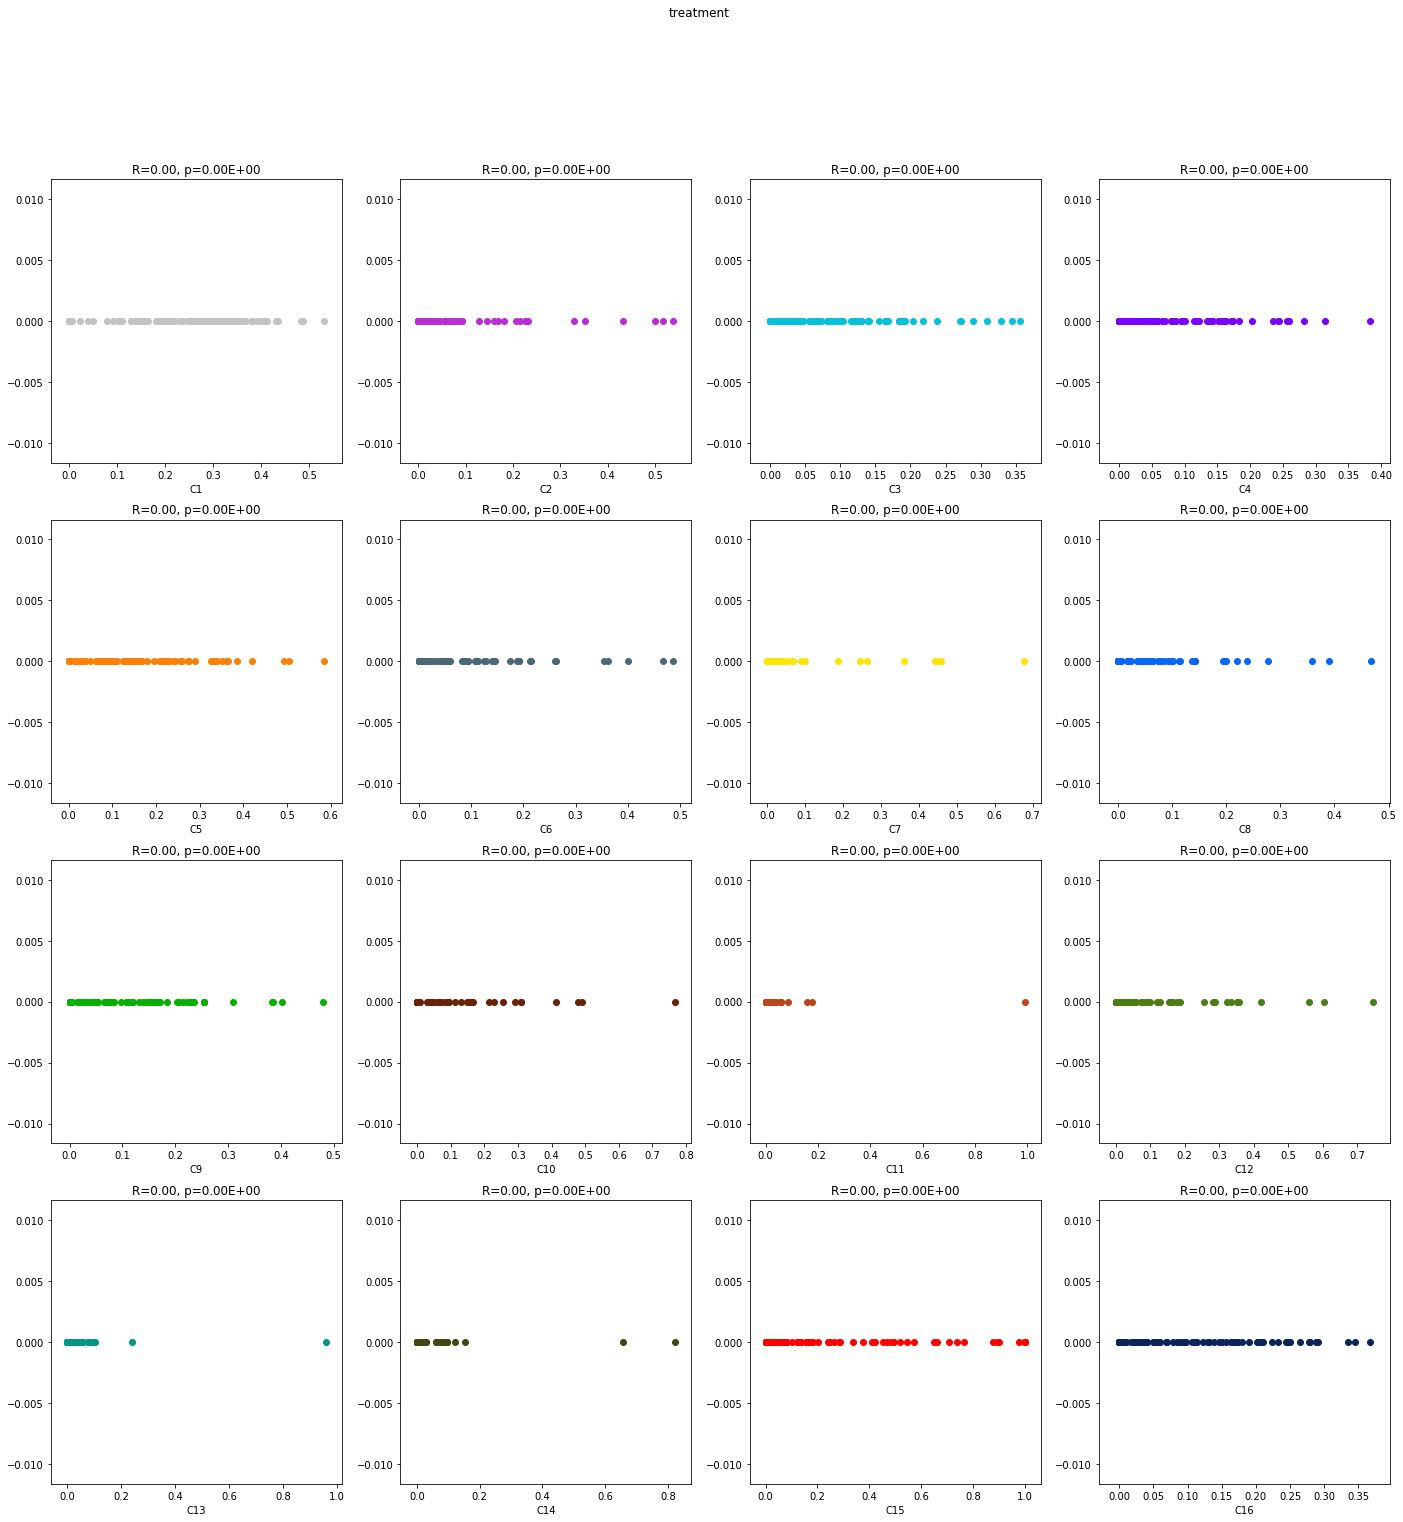

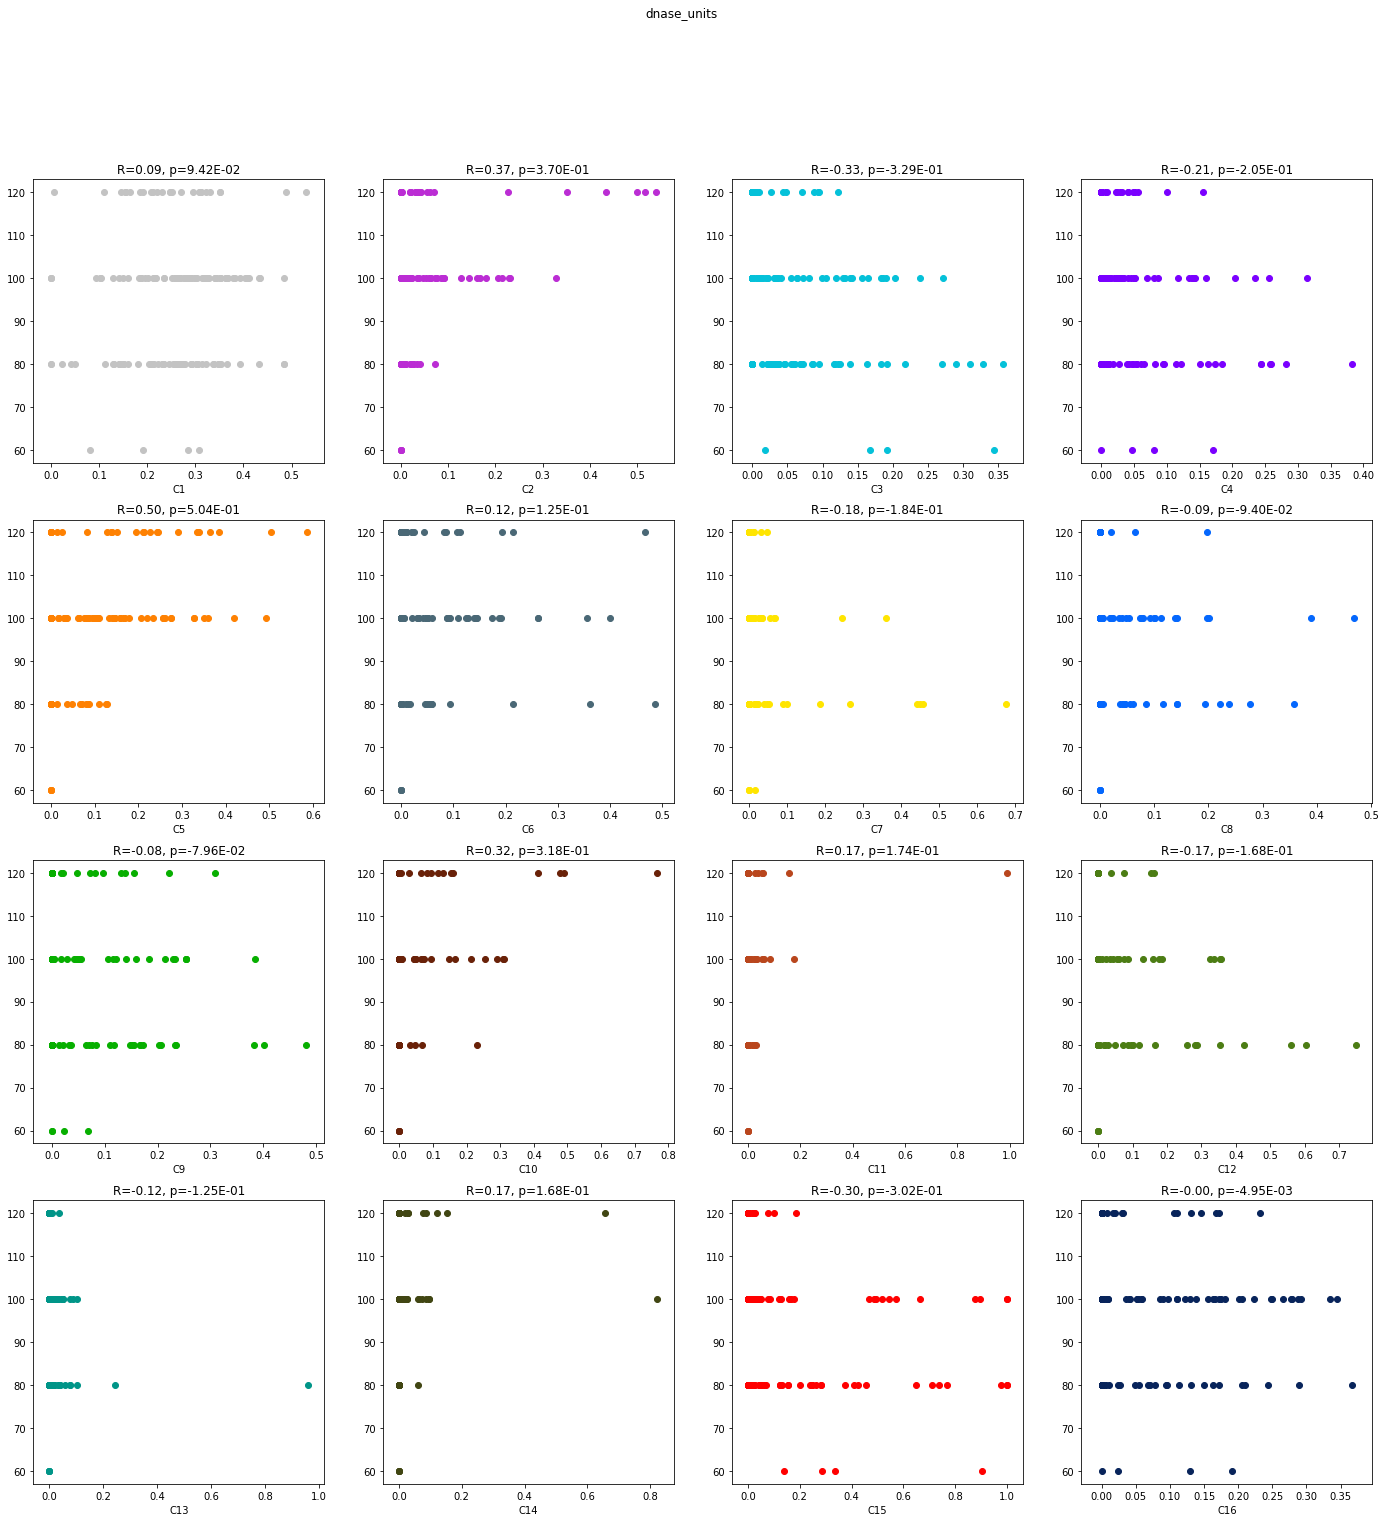

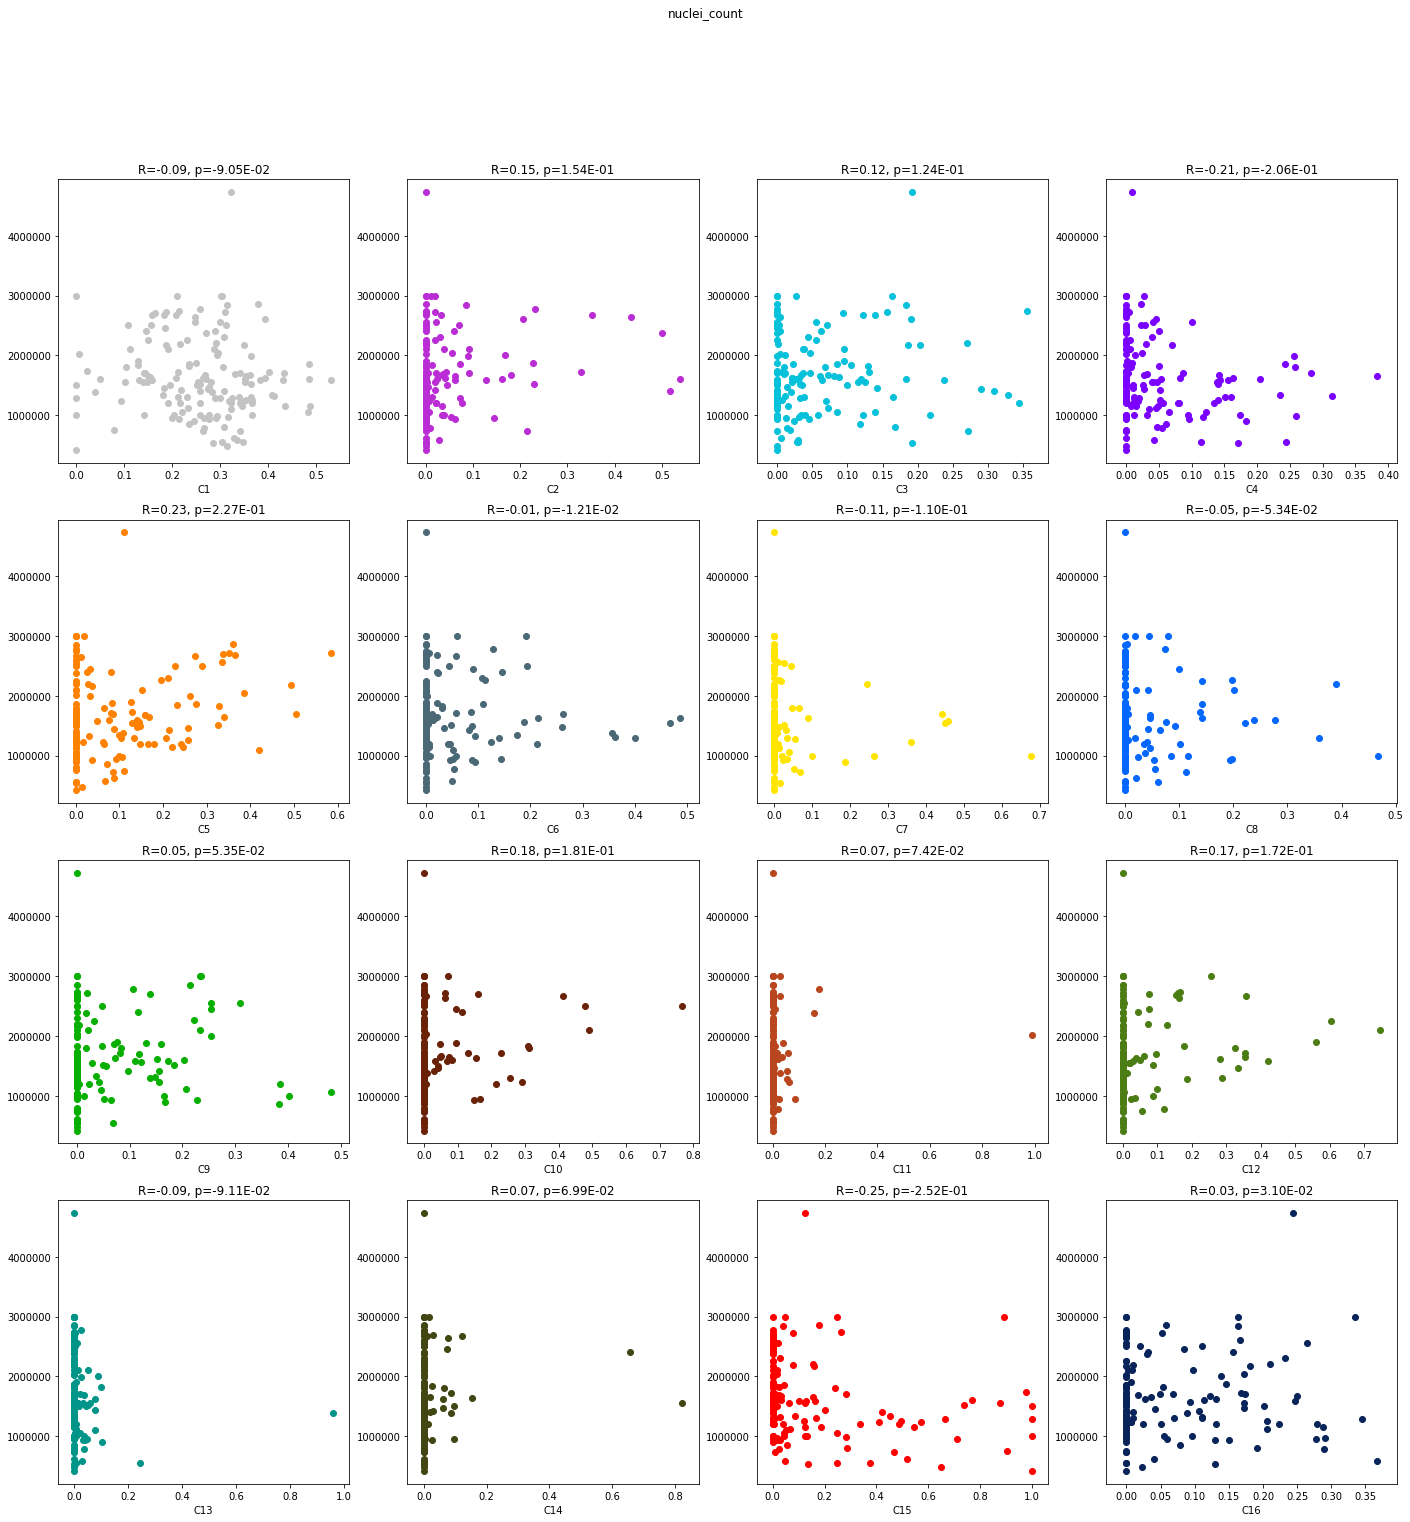

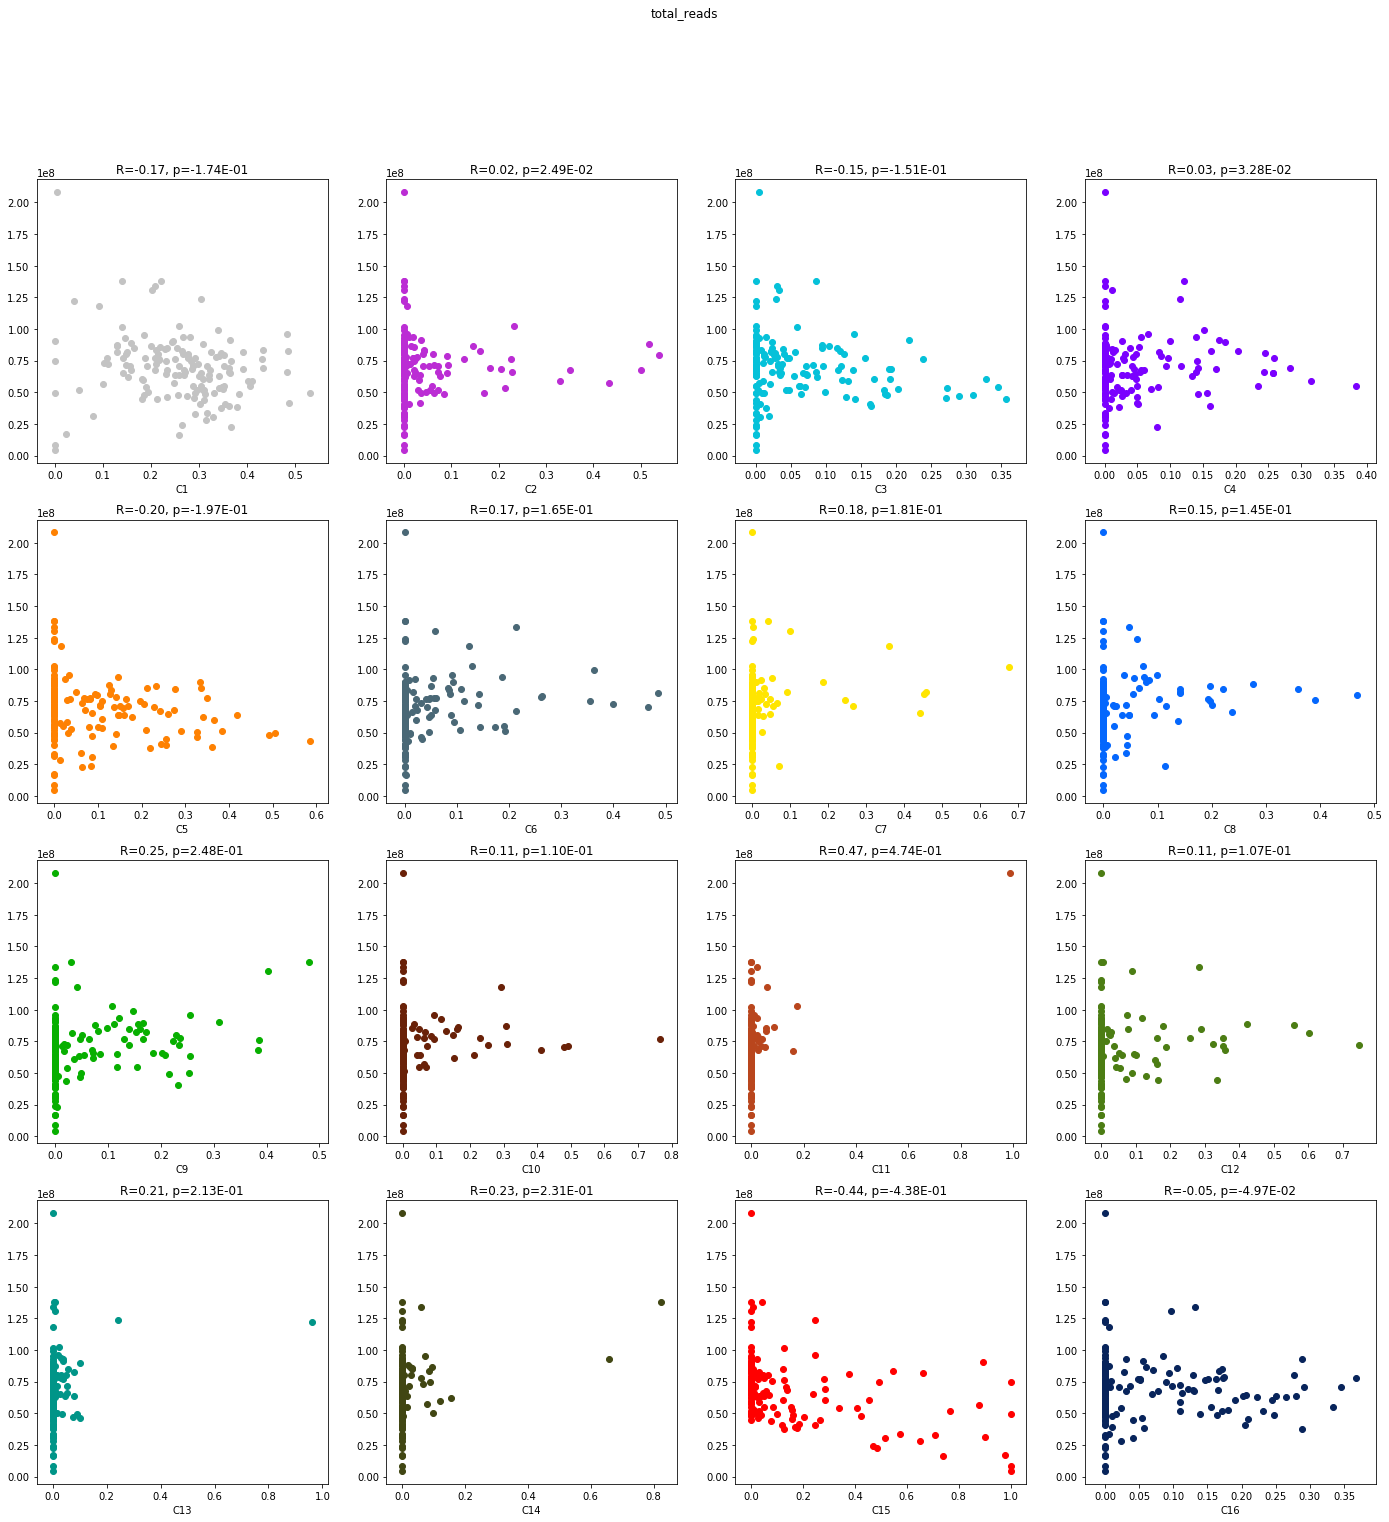

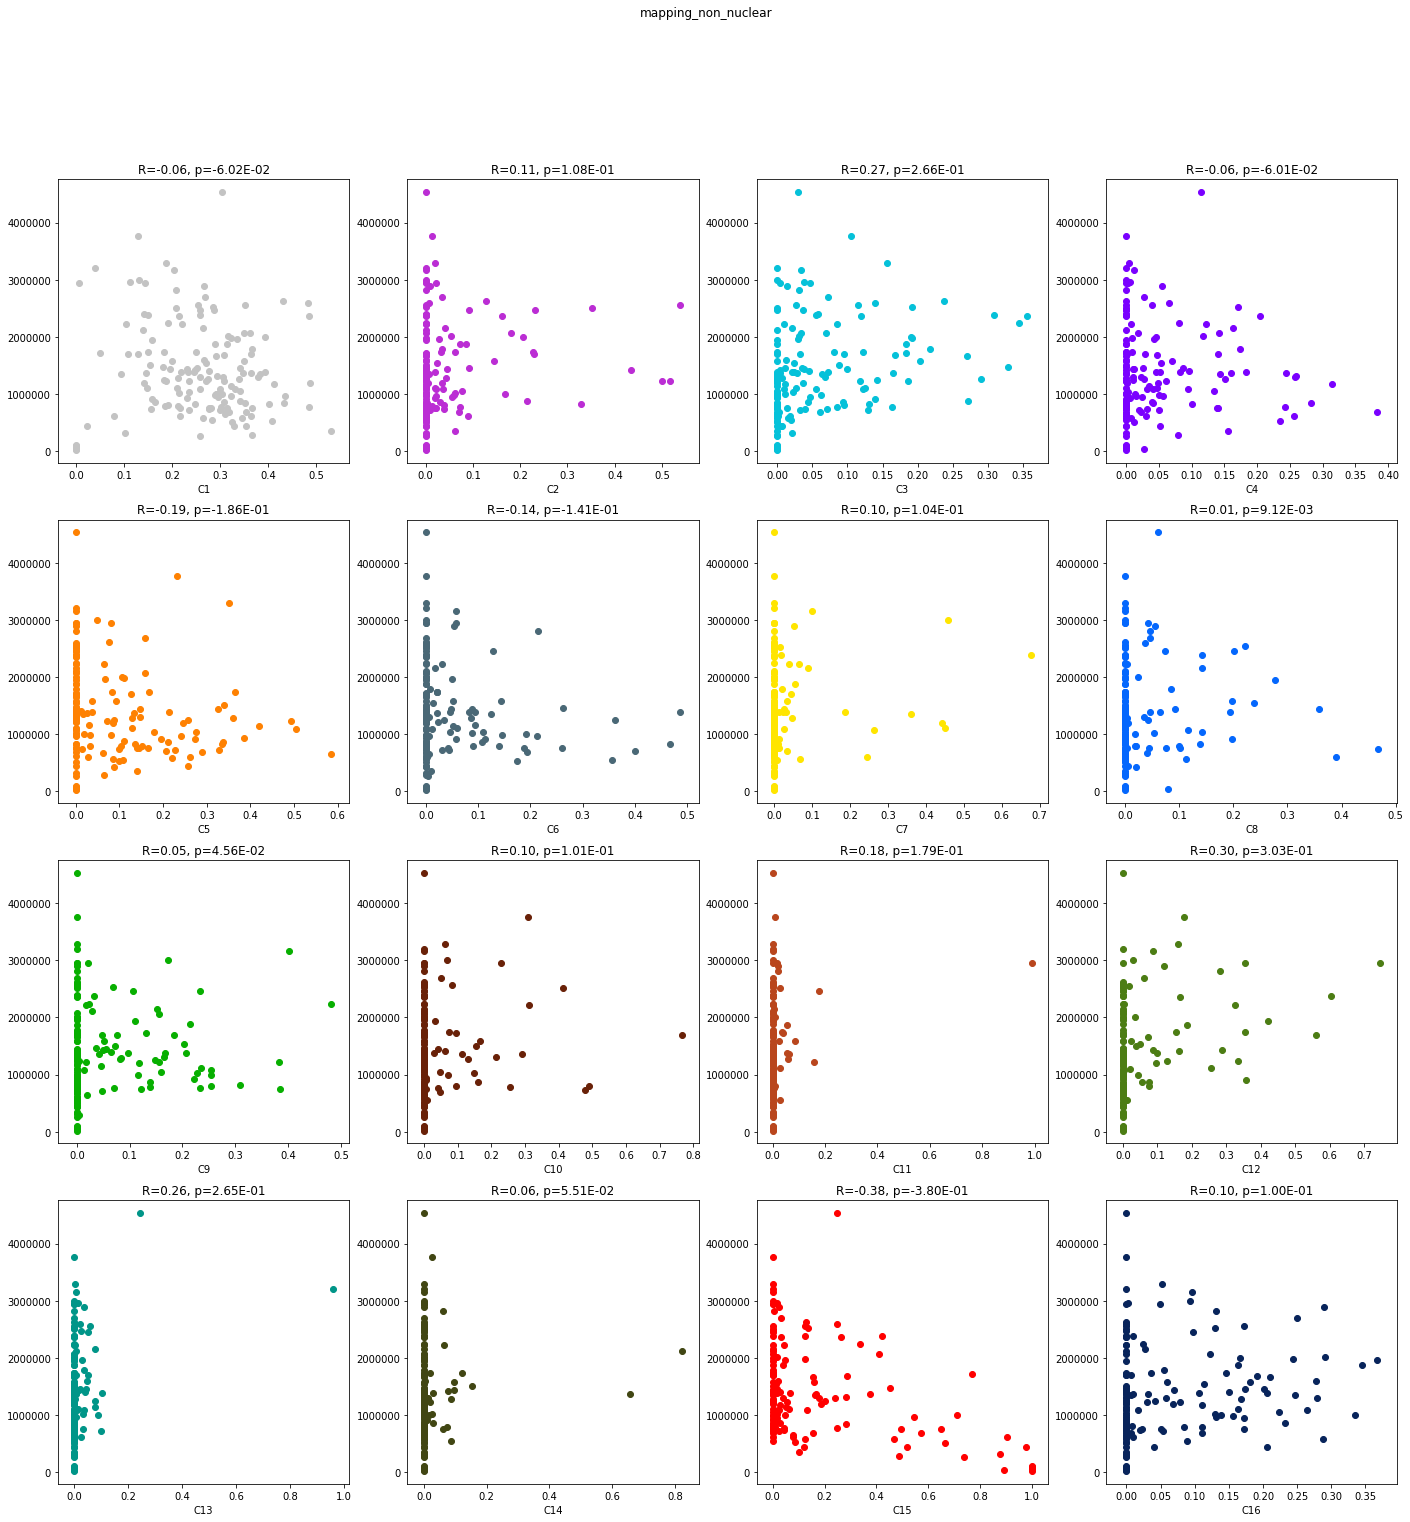

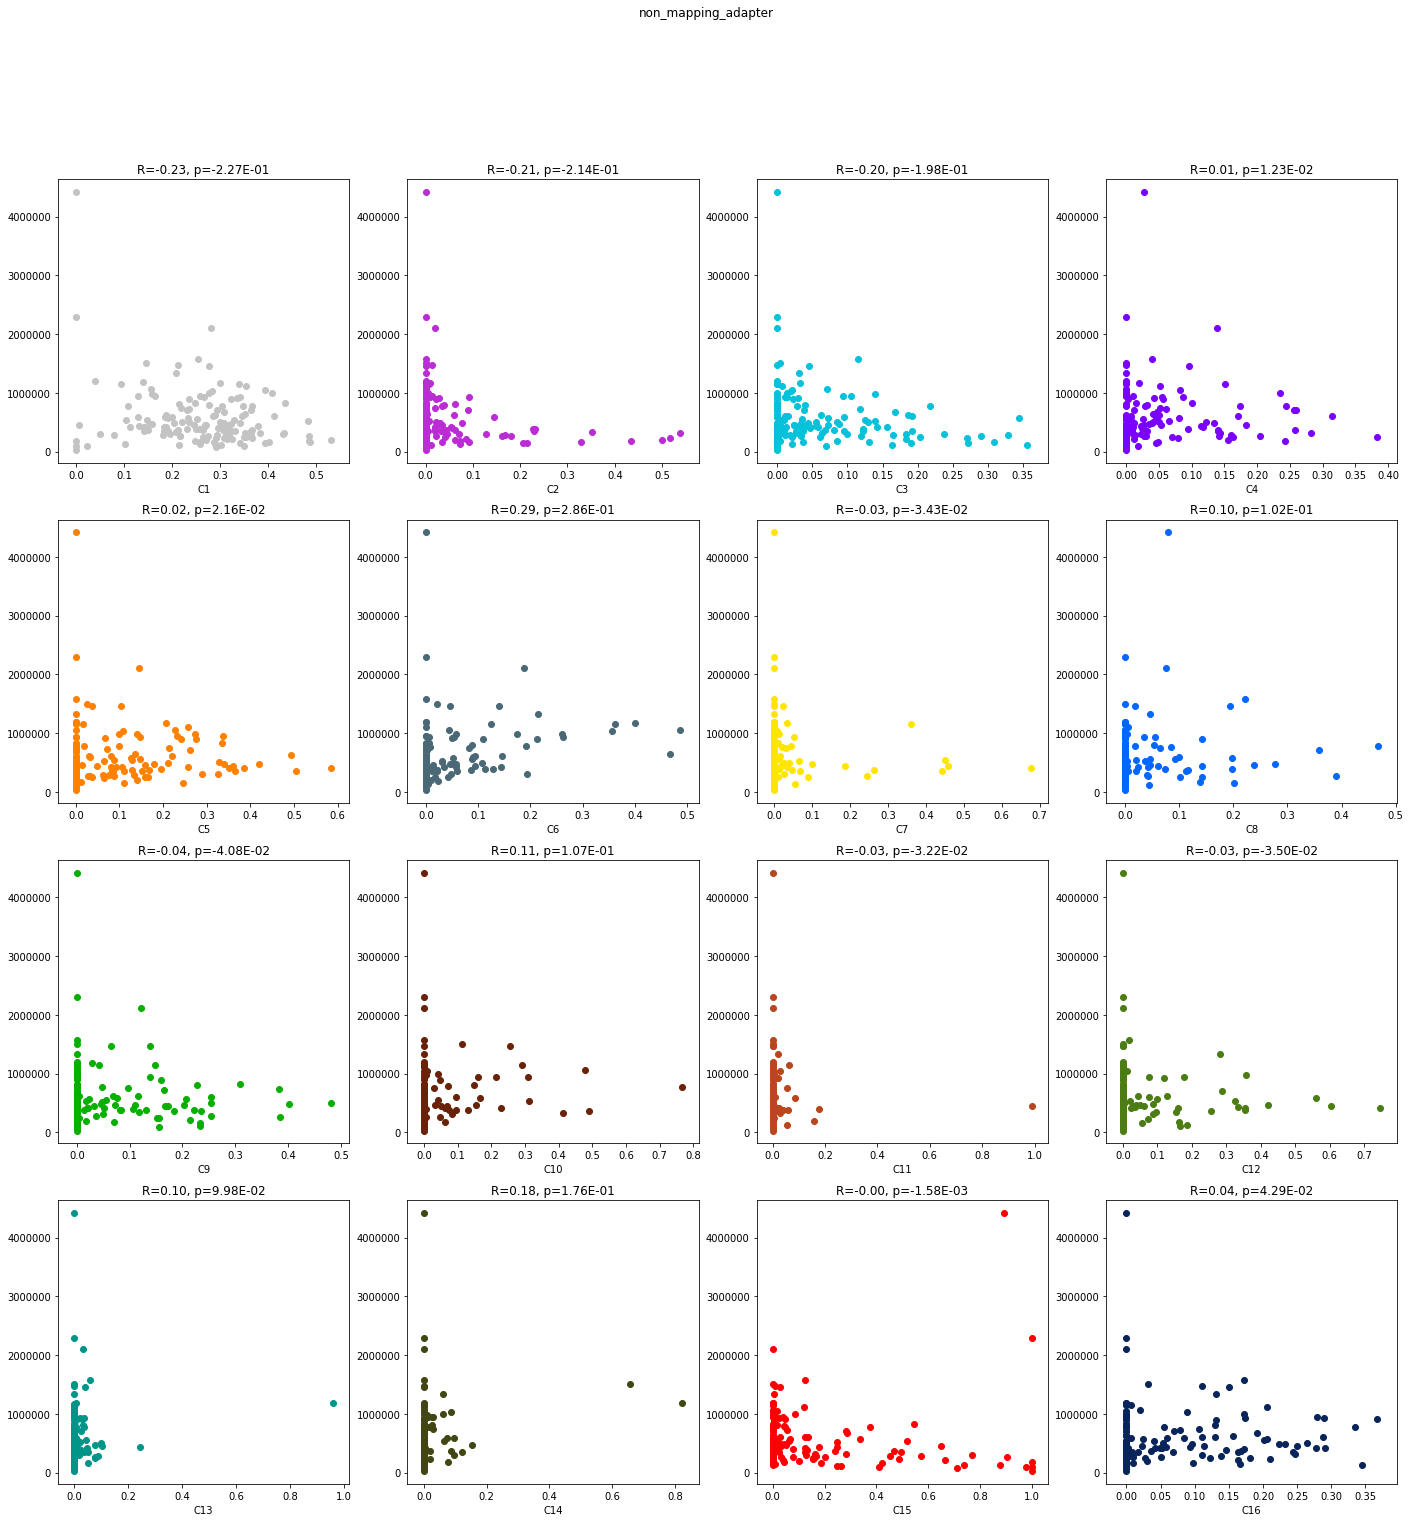

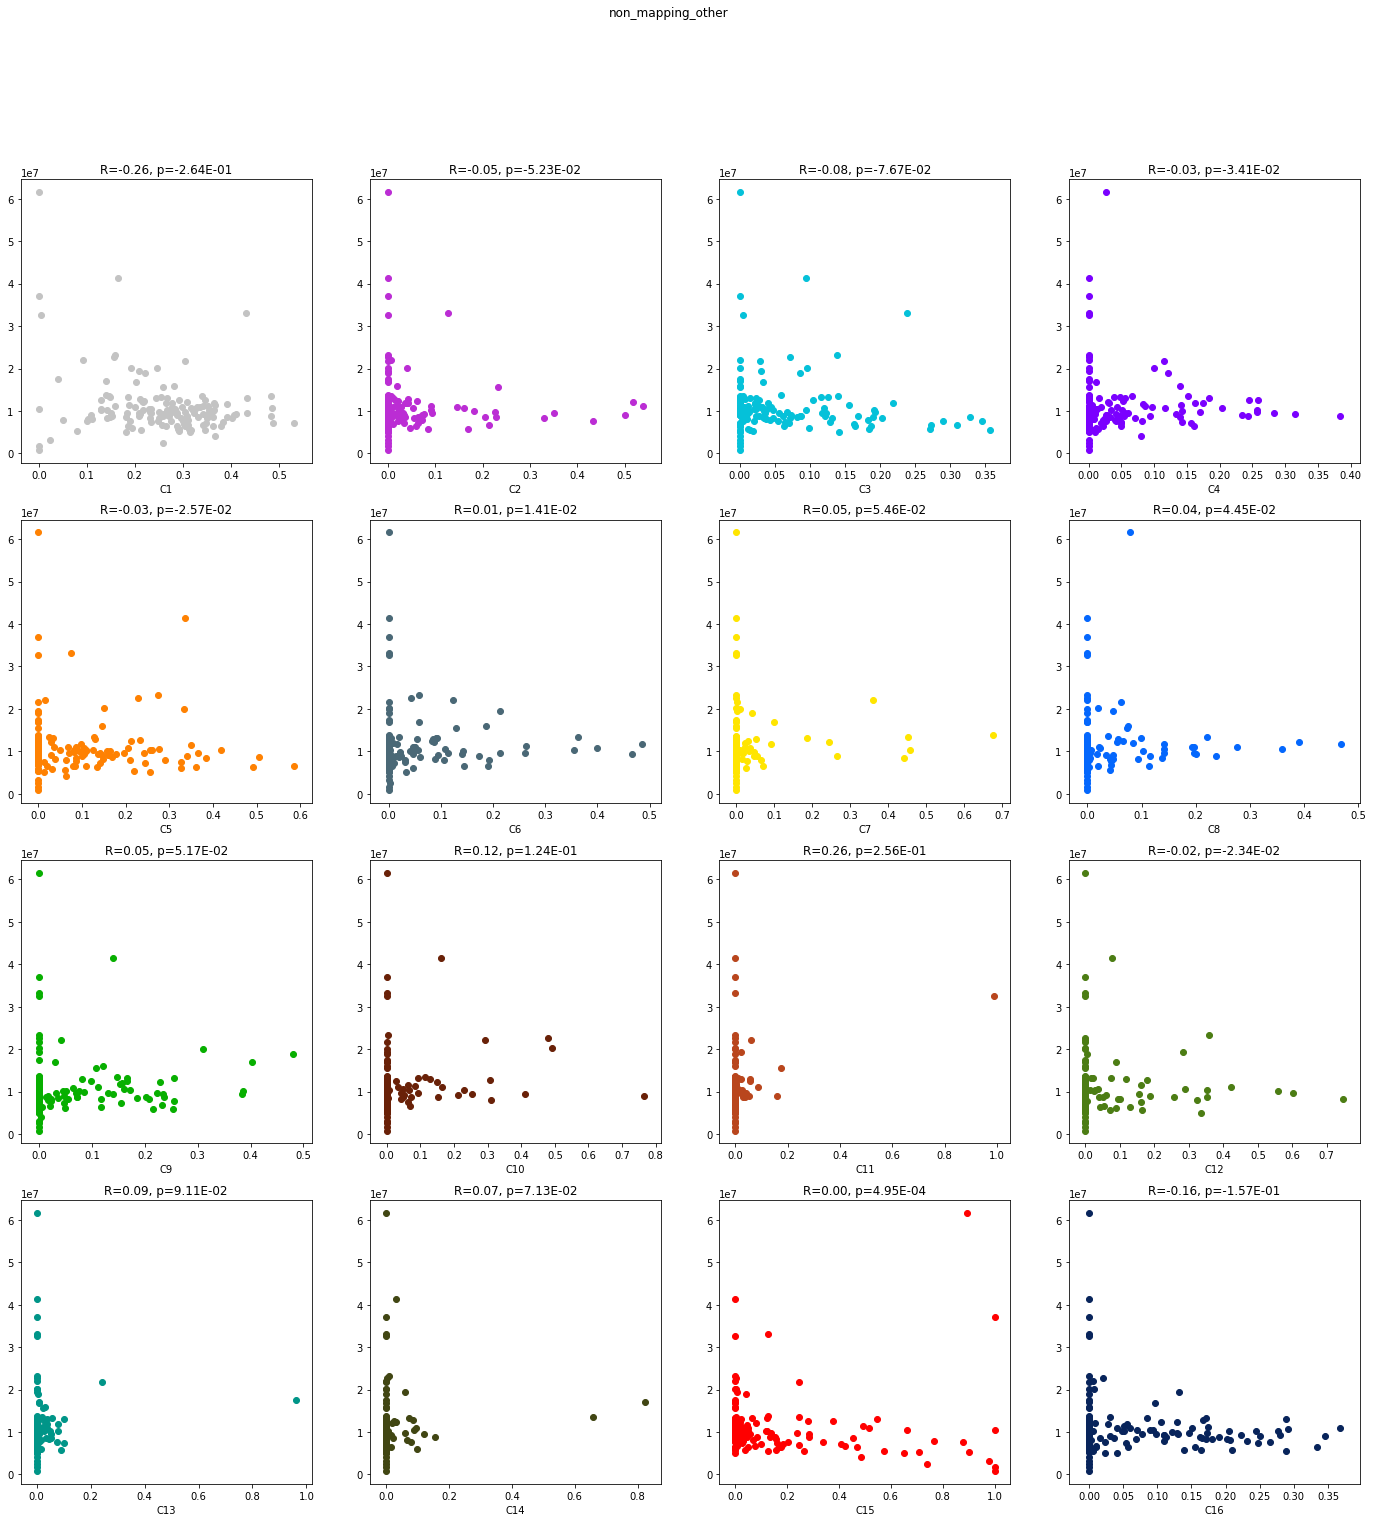

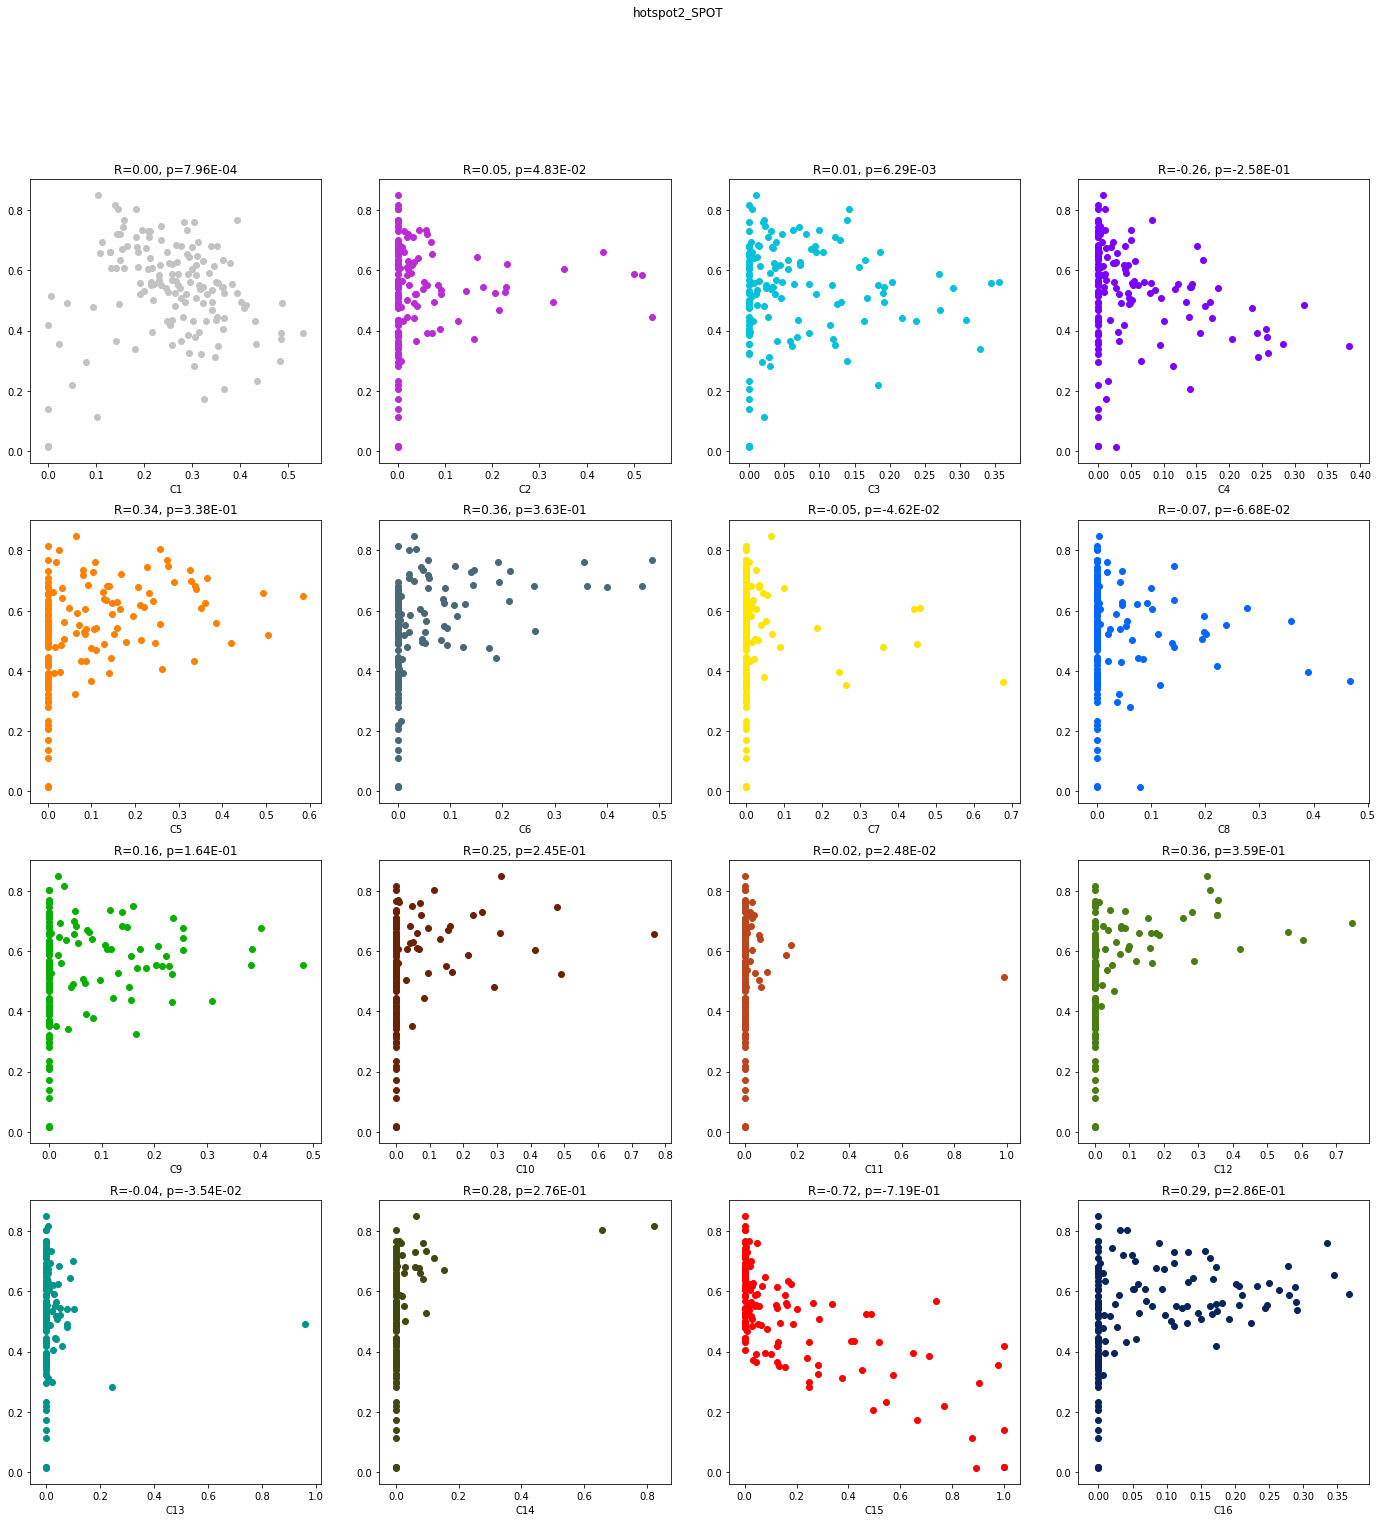

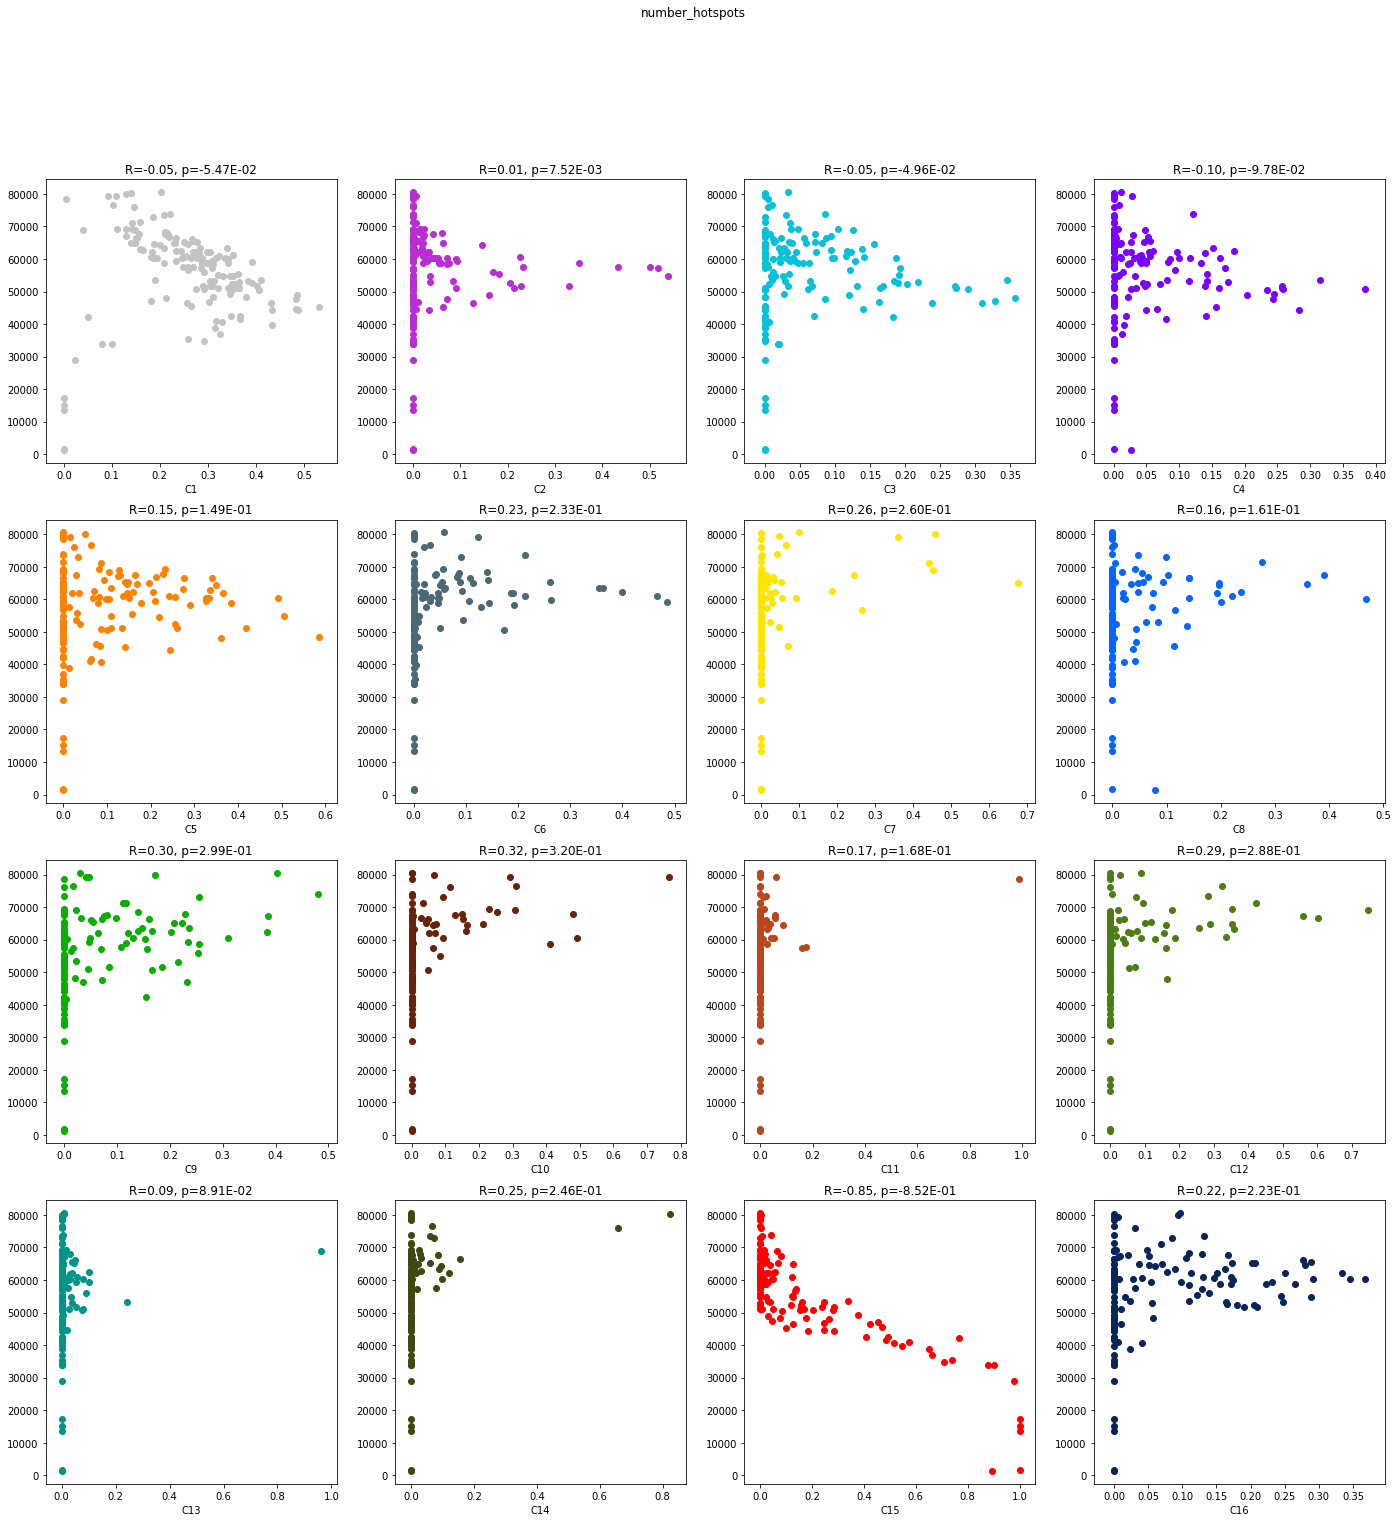

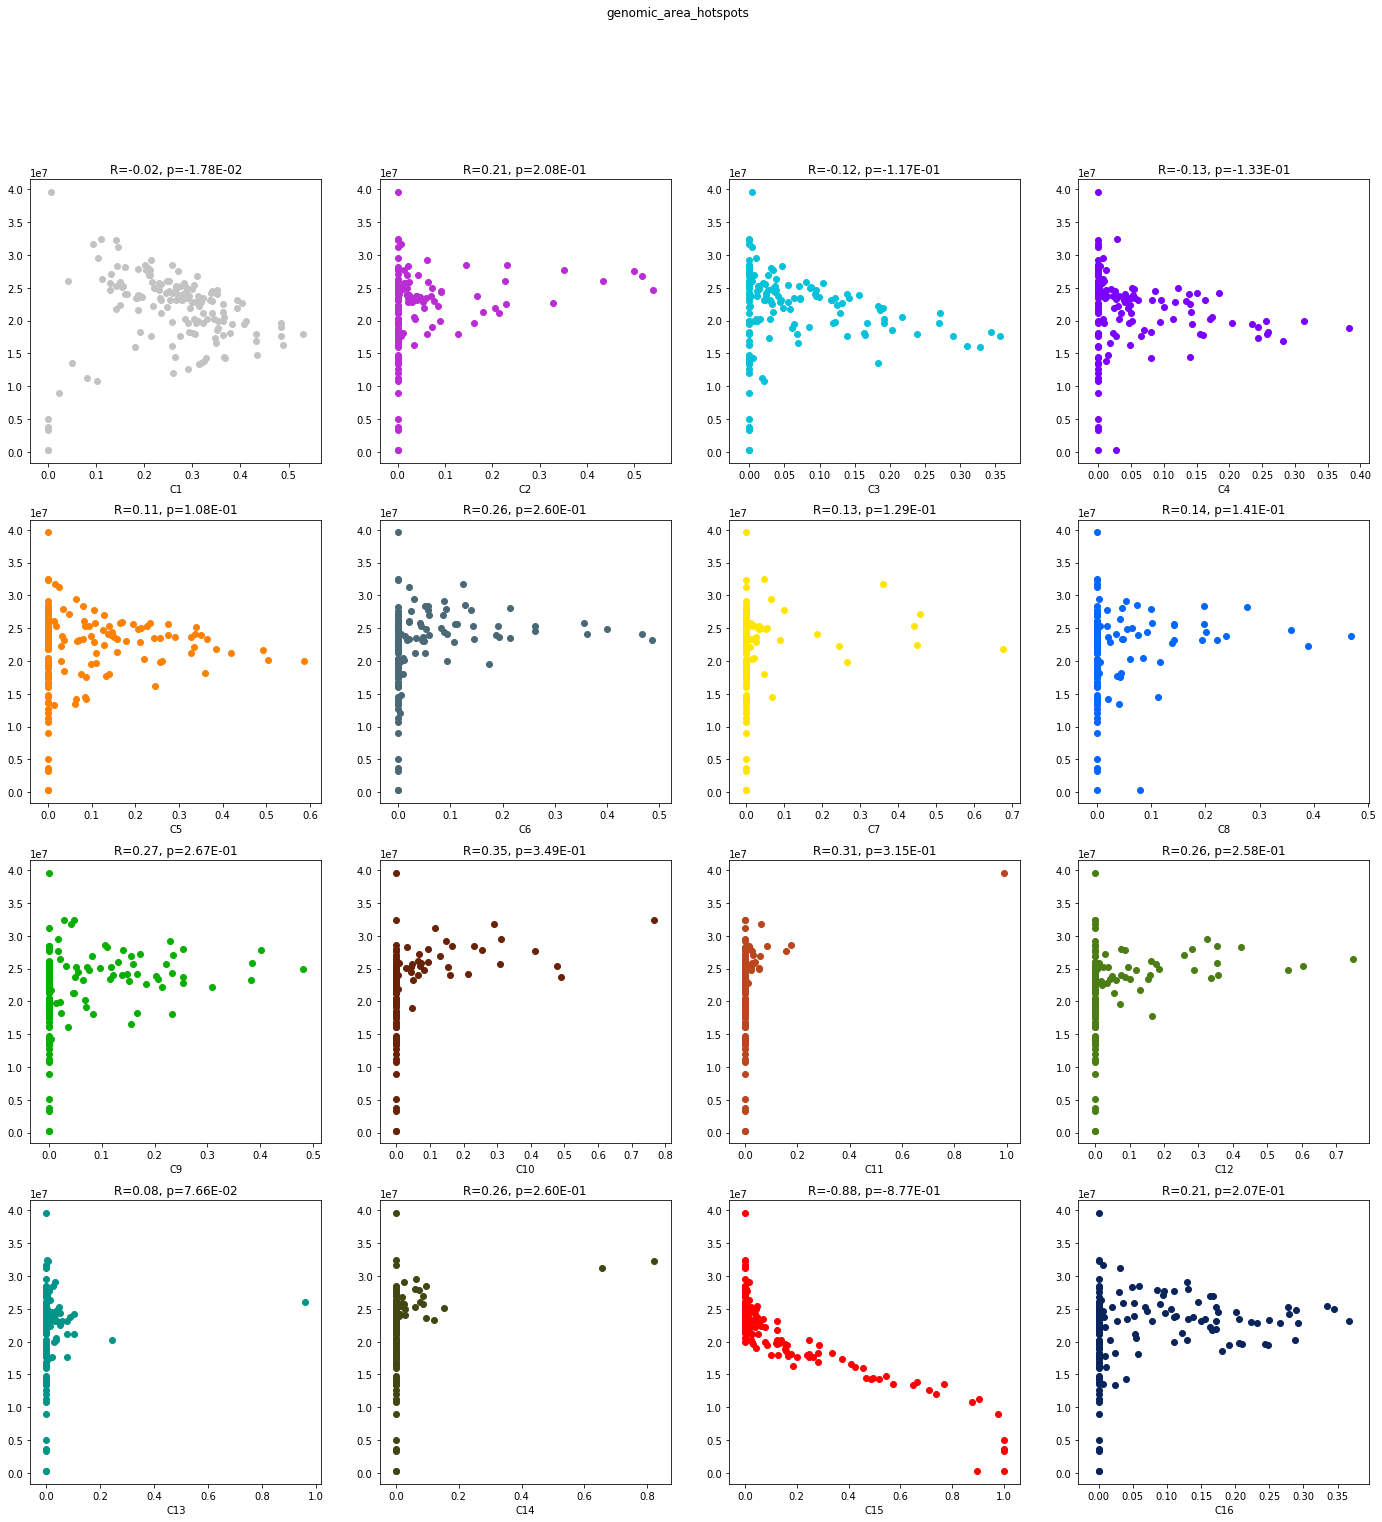

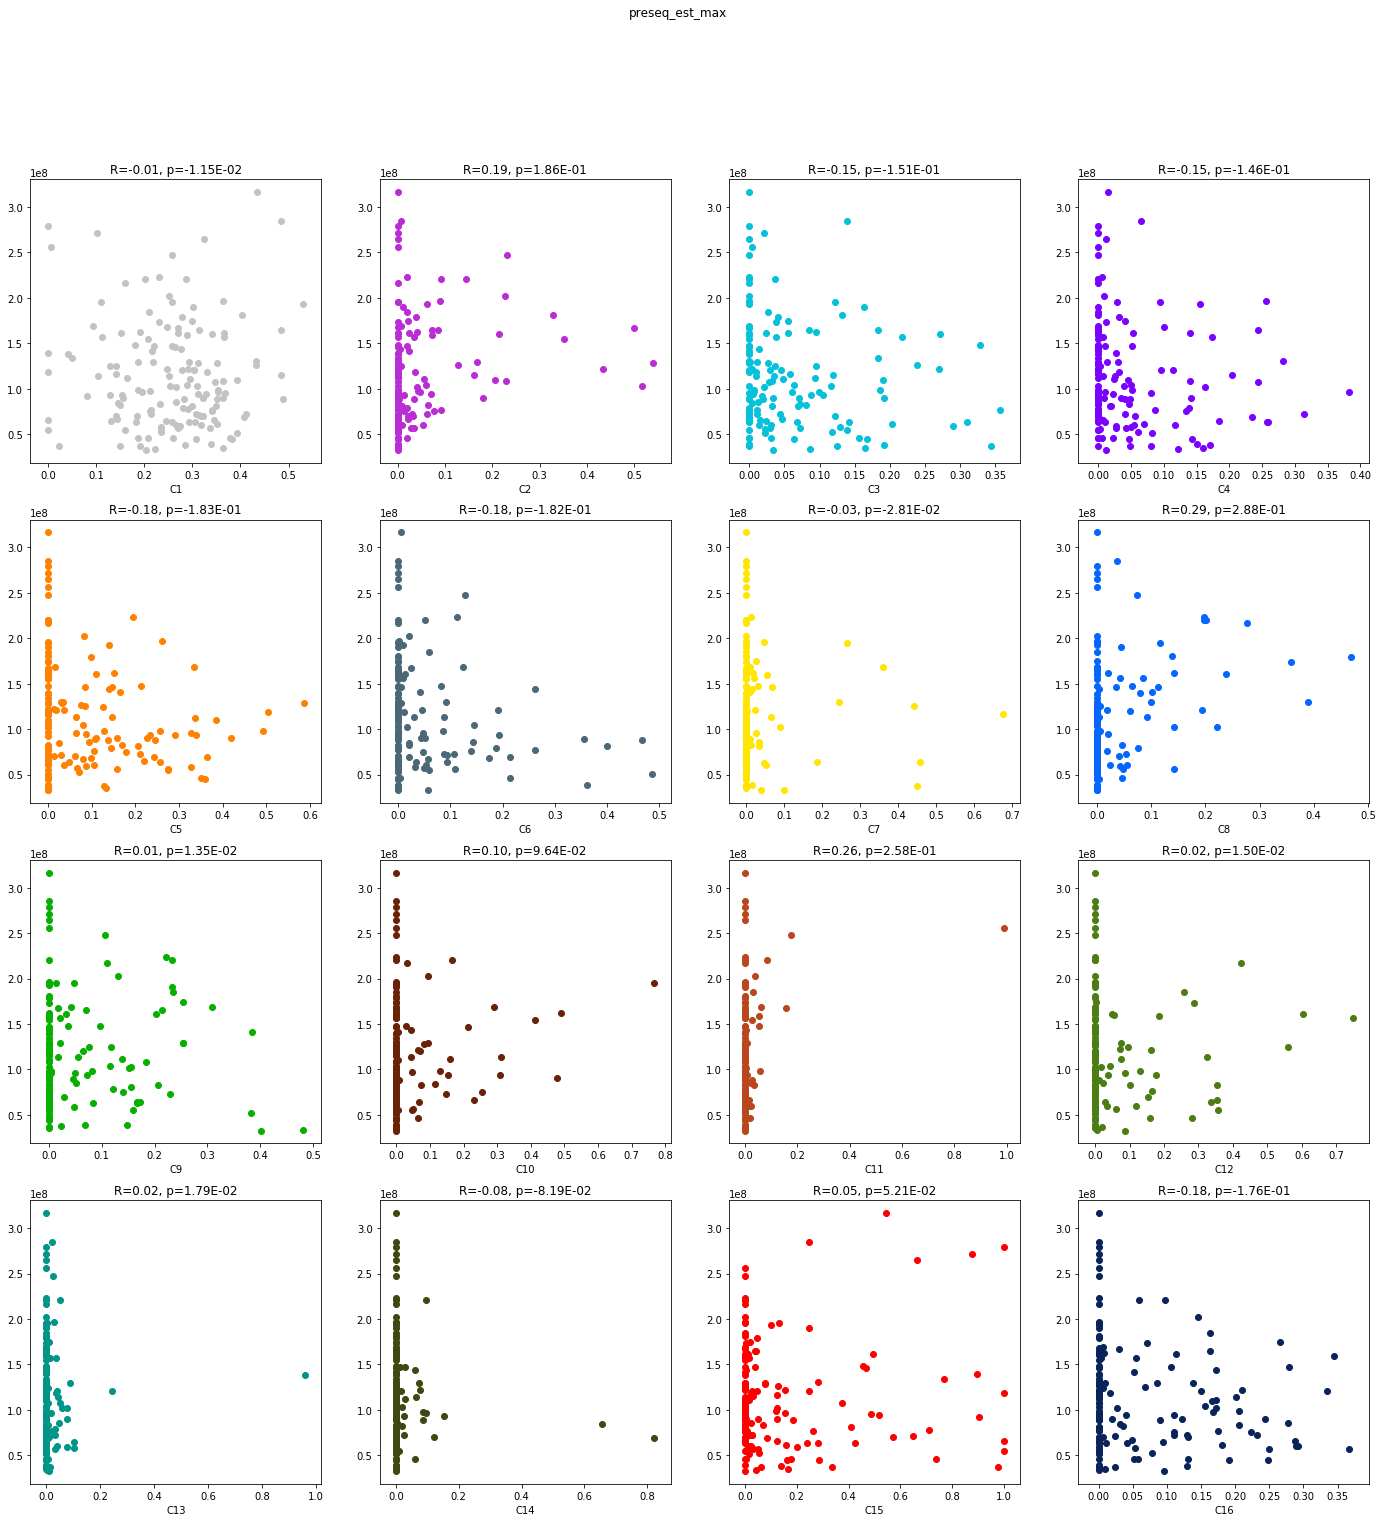

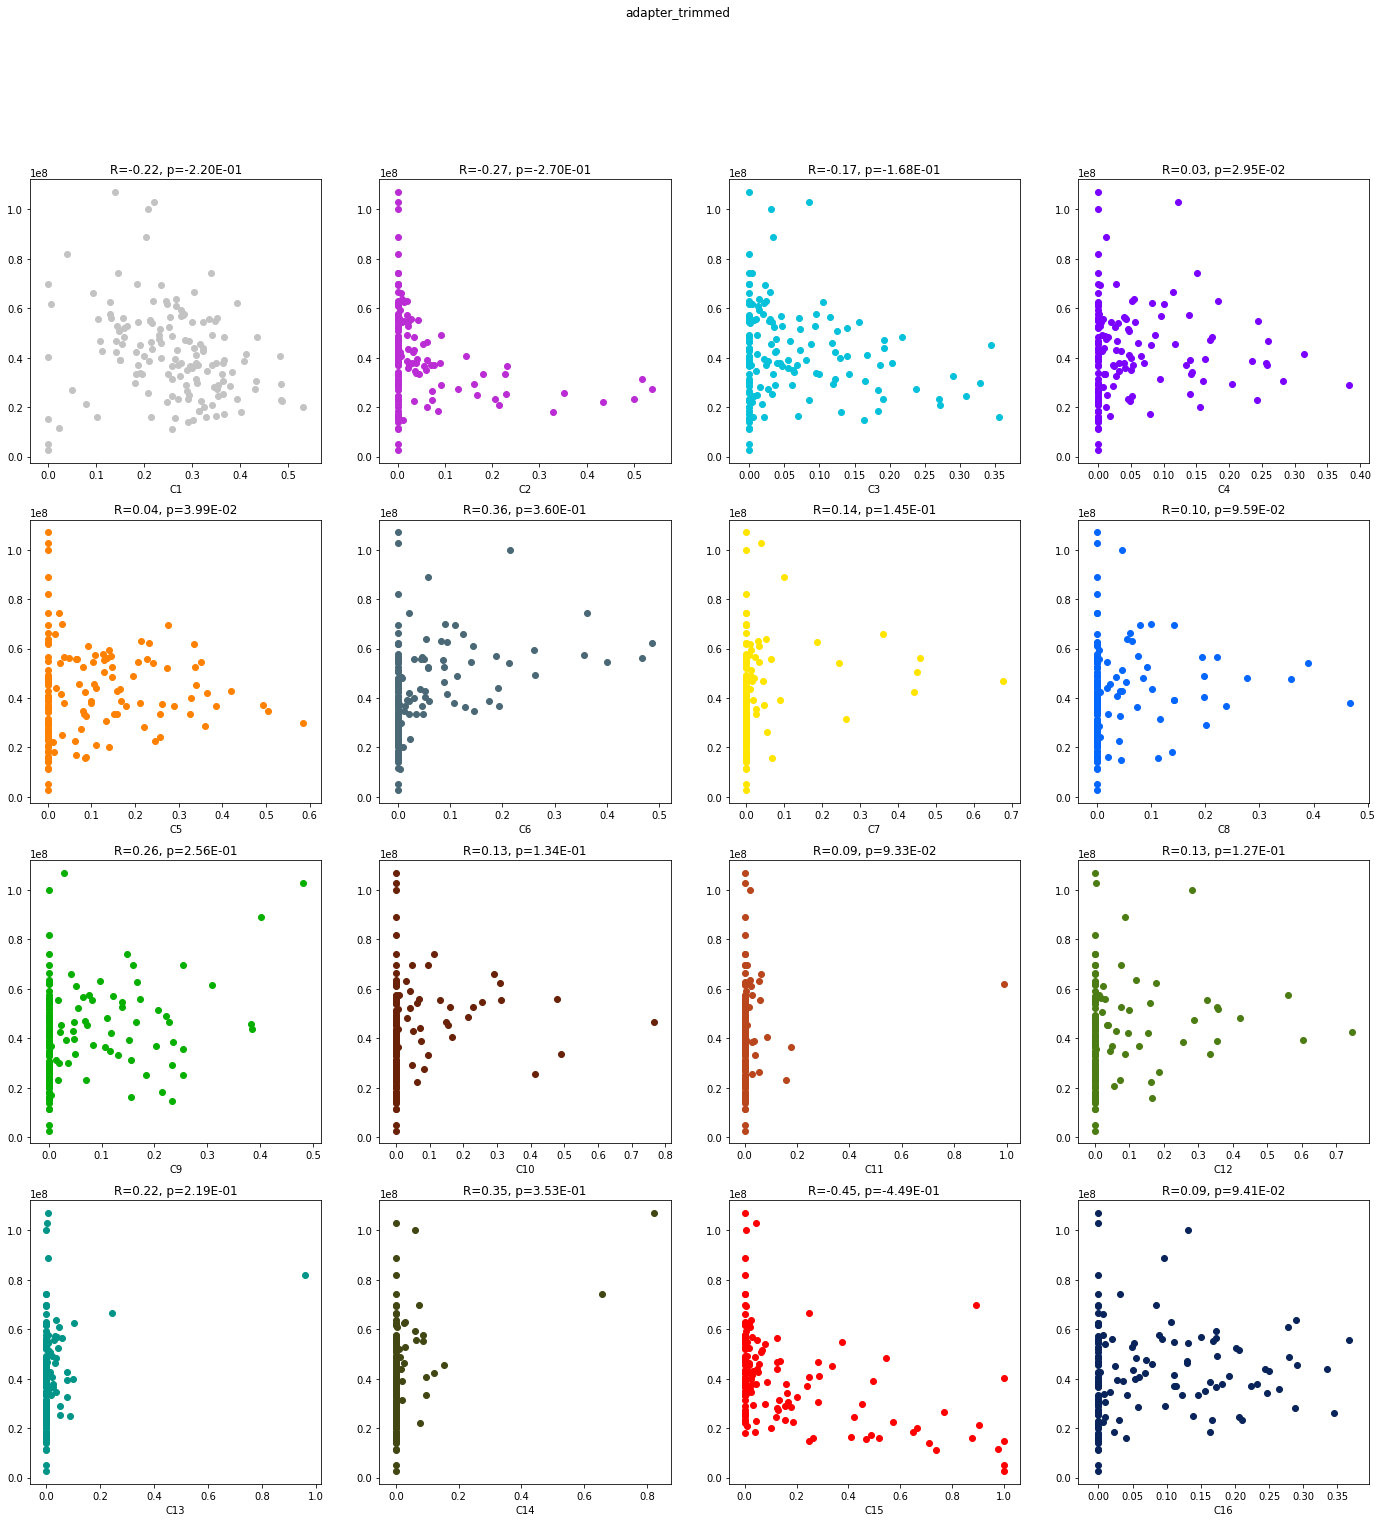

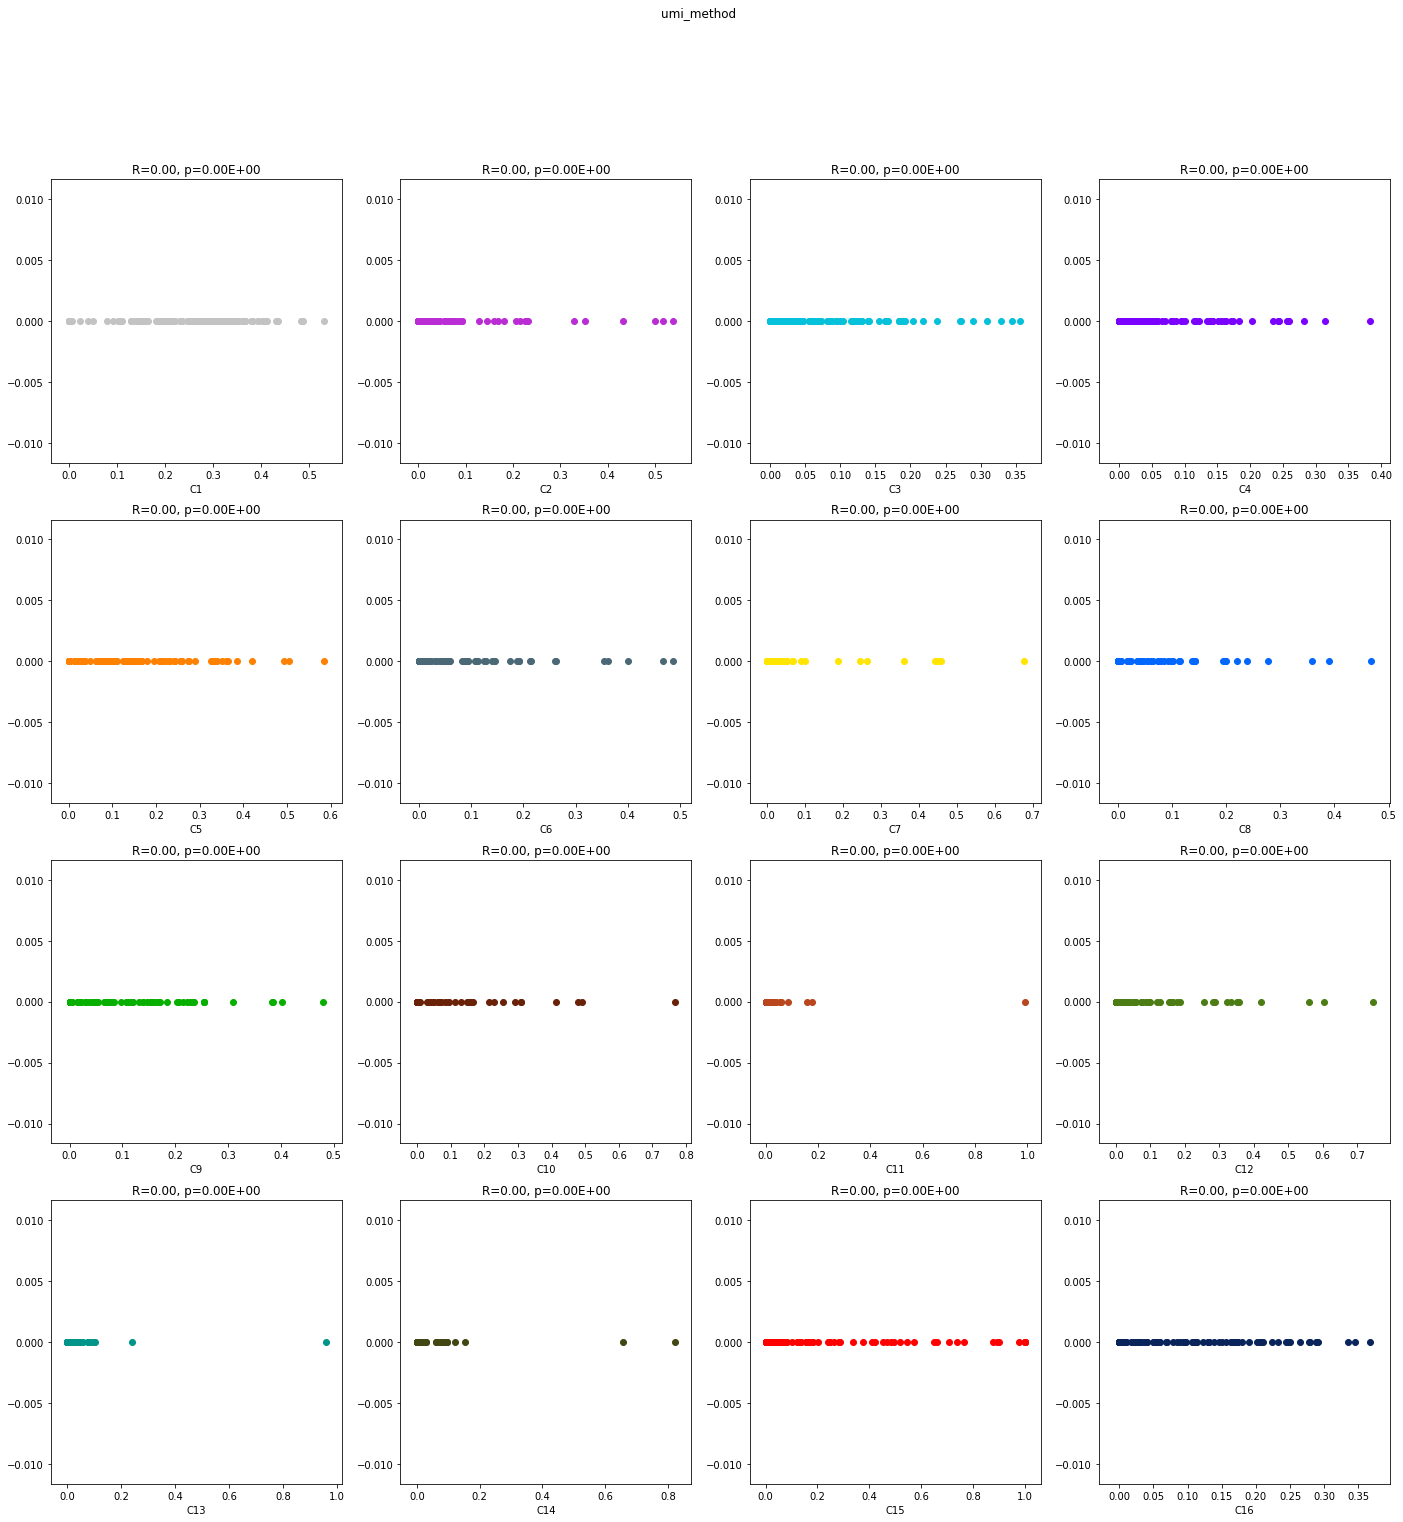

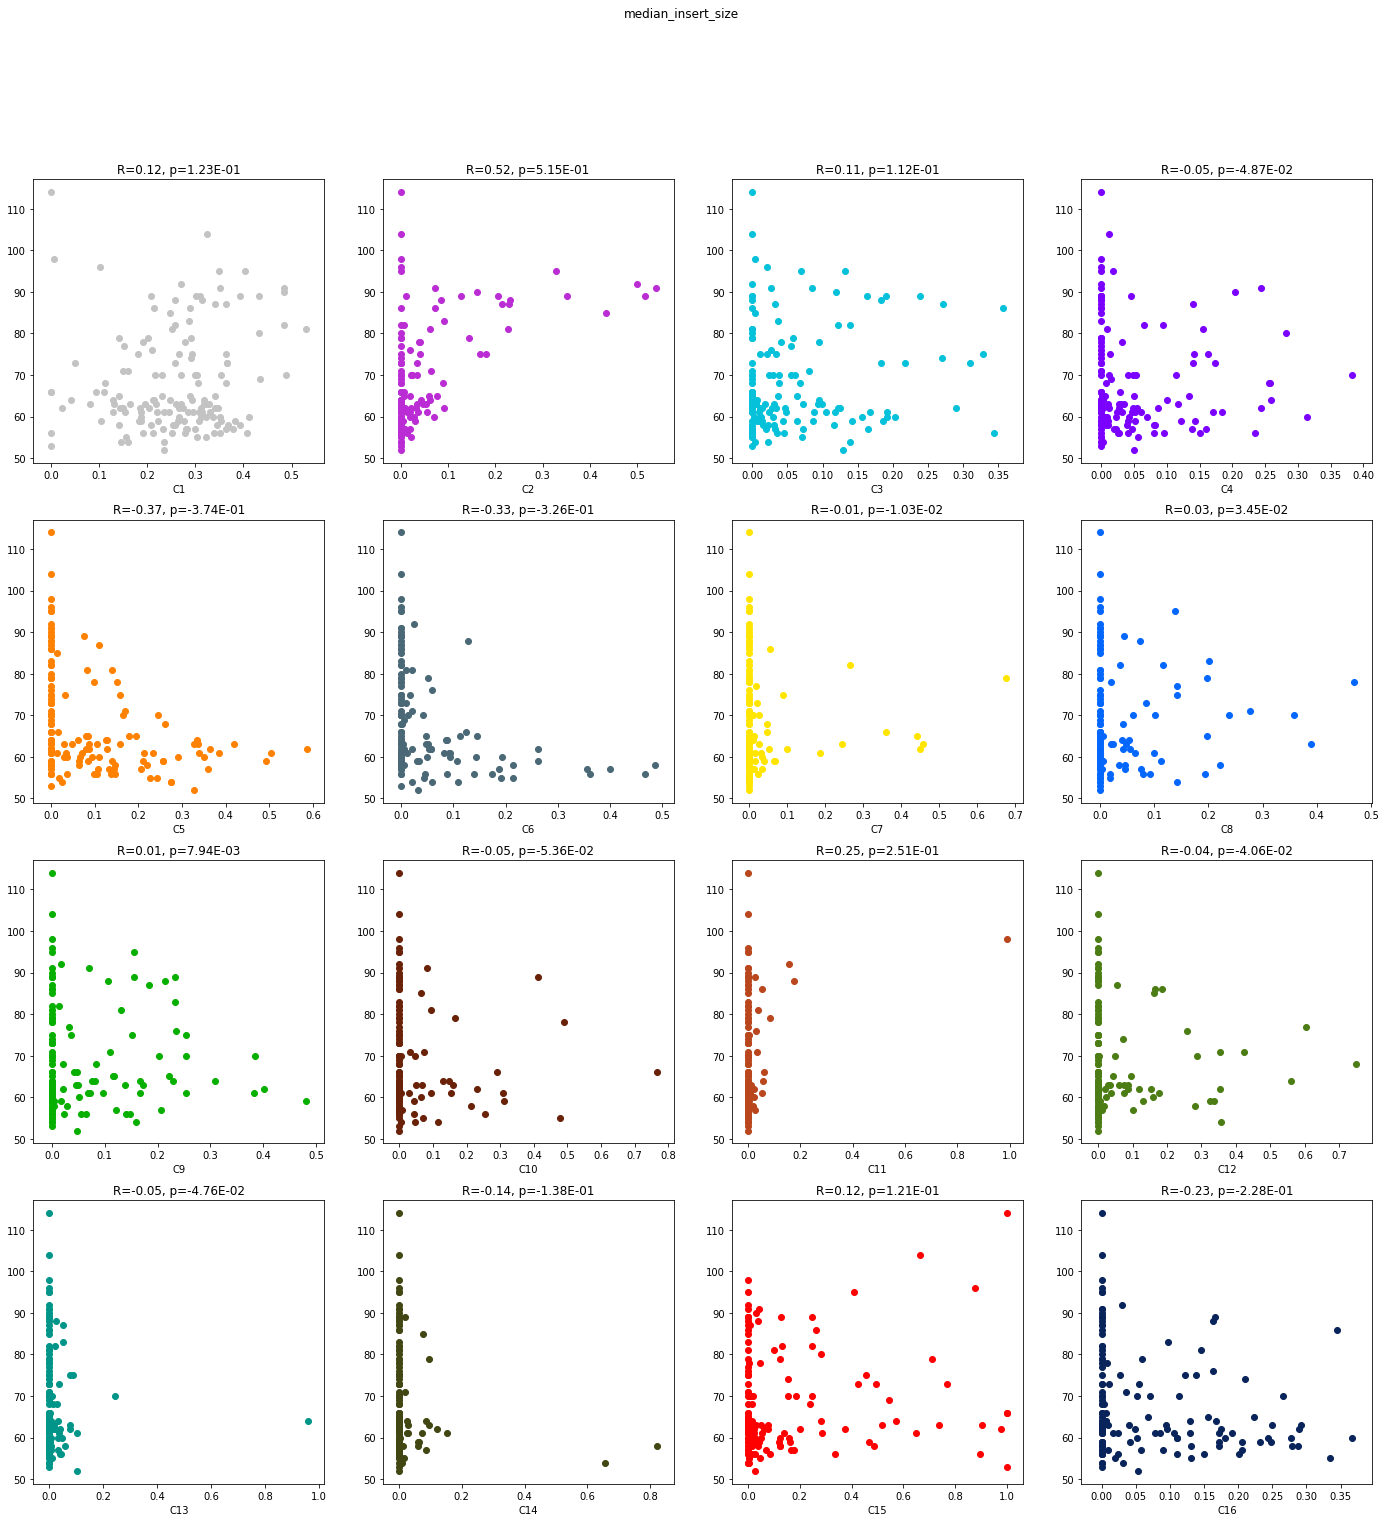

In [60]:
for cat in non_object_cats[non_object_cats].keys().values:
    #print(cat, metadata[cat])
    fig, ax = plt.subplots(4,4, figsize=(24,24))
    for i in range(16):
        ax[i//4,i%4].scatter(myNMF.NormedBasis[:,i], metadata[cat].fillna(0), marker='o', color = myNMF.Comp_colors[i])
        ax[i//4,i%4].set_xlabel('C'+str(i+1))
        myregress = linregress(myNMF.NormedBasis[:,i], metadata[cat].fillna(0))
        ax[i//4,i%4].set_title('R='+'{:3.2f}'.format(myregress.rvalue)+ ', p='+"{:.2E}".format(myregress.rvalue))
        #print(i, myregress.rvalue)
    fig.suptitle(cat)
    plt.show()